In [1]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

In [85]:
crime=pd.read_csv('chicago_crimes_data_2010_2017.csv')

In [75]:
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,THEFT,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train


In [76]:
crime = crime.sort_values('train_or_test', ascending=False)

In [77]:
#Total instances in the data set
len(crime)

488270

In [78]:
crime[crime['train_or_test']=='train']

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
254177,309726,7773726,HS581397,10/25/2010 10:00,082XX S EVANS AVE,530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,APARTMENT,False,True,631,6,6,44,04A,42,-88,2010,train
254186,1816930,10215652,HY401929,8/29/2015 11:10,055XX W FULTON ST,4625,OTHER OFFENSE,PAROLE VIOLATION,SIDEWALK,True,False,1523,15,28,25,26,42,-88,2015,train
254185,50538,7378068,HS179896,2/24/2010 21:07,045XX S LA CROSSE AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,True,False,814,8,23,56,18,42,-88,2010,train
254184,1193091,10917208,HW311596,6/9/2013 16:45,033XX W JACKSON BLVD,2017,NARCOTICS,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,True,False,1134,11,28,27,18,nan,nan,2013,train
254183,1427124,9554345,HX206482,3/31/2014 15:15,047XX S UNION AVE,890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",True,False,935,9,11,61,6,42,-88,2014,train
254182,1338630,9400703,HW543616,11/21/2013 18:00,001XX W NORTH AVE,820,THEFT,$500 AND UNDER,STREET,False,False,1821,18,43,8,6,42,-88,2013,train
254181,710286,8402254,HT634892,12/16/2011 13:25,013XX W MELROSE ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1924,19,44,6,26,42,-88,2011,train
254180,1158676,9149968,HW258604,5/2/2013 12:00,002XX S LAFLIN ST,890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1231,12,2,28,6,42,-88,2013,train
254179,337306,7816089,HS626218,11/21/2010 14:10,021XX E 71ST ST,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,333,3,5,43,26,42,-88,2010,train


In [79]:
#This tells us that 381267 rows are training sets

In [80]:
crime[crime['train_or_test']=='test']

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
452602,2362370,11087557,JA431253,9/11/2017 9:00,014XX N LOTUS AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,2532,25,37,25,11,42,-88,2017,test
452603,2223919,10875533,JA183998,3/11/2017 22:15,056XX S CARPENTER ST,820,THEFT,$500 AND UNDER,APARTMENT,False,False,712,7,16,68,6,42,-88,2017,test
452605,2231869,10888917,JA198933,3/24/2017 16:00,008XX S CALIFORNIA AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1135,11,28,27,08B,42,-88,2017,test
452604,2188717,10825242,JA126622,1/20/2017 7:30,043XX W 69TH ST,820,THEFT,$500 AND UNDER,OTHER,False,False,833,8,13,65,6,42,-88,2017,test
452606,2396304,11130830,JA487399,10/26/2017 21:30,117XX S PRINCETON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,522,5,34,53,08B,42,-88,2017,test
452607,2379835,11108135,JA457559,10/4/2017 6:05,061XX S RICHMOND ST,1020,ARSON,BY FIRE,STREET,False,False,823,8,15,66,9,42,-88,2017,test
452608,2343516,11057654,JA394685,8/17/2017 8:30,024XX W 55TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,824,8,16,63,14,42,-88,2017,test
452600,1996186,10517694,HZ259816,5/10/2016 15:30,008XX N STATE ST,890,THEFT,FROM BUILDING,OTHER,False,False,1832,18,42,8,6,42,-88,2016,test
452601,2061094,10619446,HZ372920,7/31/2016 16:50,028XX N SHERIDAN RD,810,THEFT,OVER $500,SIDEWALK,False,False,1934,19,44,6,6,42,-88,2016,test
452589,2194886,10831491,JA133029,1/28/2017 11:00,008XX S KARLOV AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,1132,11,24,26,08A,42,-88,2017,test


In [9]:
#no of testing instances is 107003


In [81]:
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
254177,309726,7773726,HS581397,10/25/2010 10:00,082XX S EVANS AVE,530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,APARTMENT,False,True,631,6,6,44,04A,42,-88,2010,train
254186,1816930,10215652,HY401929,8/29/2015 11:10,055XX W FULTON ST,4625,OTHER OFFENSE,PAROLE VIOLATION,SIDEWALK,True,False,1523,15,28,25,26,42,-88,2015,train
254185,50538,7378068,HS179896,2/24/2010 21:07,045XX S LA CROSSE AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,True,False,814,8,23,56,18,42,-88,2010,train
254184,1193091,10917208,HW311596,6/9/2013 16:45,033XX W JACKSON BLVD,2017,NARCOTICS,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,True,False,1134,11,28,27,18,nan,nan,2013,train


In [82]:
crime_train=crime[0:381267]

In [83]:
crime_train.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
127085,1195477,9170891,HW315337,6/12/2013 12:30,006XX E 67TH ST,5011,OTHER OFFENSE,LICENSE VIOLATION,GROCERY FOOD STORE,False,False,321,3,20,42,26,42,-88,2013,train
127086,1186070,9155060,HW300660,6/1/2013 19:18,087XX S PEORIA ST,1200,DECEPTIVE PRACTICE,STOLEN PROP: BUY/RECEIVE/POS.,STREET,True,False,2222,22,21,71,13,42,-88,2013,train
127089,91790,7811500,HS621456,4/5/2010 22:00,029XX N HAMLIN AVE,890,THEFT,FROM BUILDING,RESIDENCE,False,False,2523,25,30,21,6,42,-88,2010,train
127091,1342101,9405673,HW548994,11/26/2013 14:00,0000X W LAKE ST,890,THEFT,FROM BUILDING,RESTAURANT,False,False,111,1,42,32,6,42,-88,2013,train
127088,1227132,9218874,HW365392,7/16/2013 17:03,035XX W MELROSE ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1732,17,35,21,08B,42,-88,2013,train


In [13]:
#to make things easier have presorted in excel

In [14]:
#re-read the file

In [15]:
#now checking head

In [86]:
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,THEFT,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train


In [87]:
#Sorted: Now converting into training and testing


In [88]:
crime_train=crime[0:381266]


In [217]:
crime_test=crime[381267:488270]

In [90]:
crime_train

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,THEFT,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train
5,333192,7810523,HS620548,11/17/2010 10:30,077XX S SOUTH SHORE DR,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,421,4,7,43,5,42,-88,2010,train
6,1426734,9553552,HX205552,3/31/2014 0:01,033XX W FRANKLIN BLVD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,1121,11,28,23,7,42,-88,2014,train
7,1300180,9336715,HW480384,10/5/2013 4:15,002XX E 121ST PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,532,5,9,53,14,42,-88,2013,train
8,90734,7439846,HS242094,4/4/2010 20:45,074XX N CLARK ST,890,THEFT,FROM BUILDING,NURSING HOME/RETIREMENT HOME,False,False,2422,24,49,1,6,42,-88,2010,train
9,1028186,8899858,HV574003,11/23/2012 16:00,048XX S LAFLIN ST,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,False,933,9,20,61,26,42,-88,2012,train


In [218]:
crime_test

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
452602,2362370,11087557,JA431253,9/11/2017 9:00,014XX N LOTUS AVE,1152,11,ILLEGAL USE CASH CARD,RESIDENCE,False,False,2532,25,37,25,11,42,-88,2017,test
452603,2223919,10875533,JA183998,3/11/2017 22:15,056XX S CARPENTER ST,820,1,$500 AND UNDER,APARTMENT,False,False,712,7,16,68,6,42,-88,2017,test
452605,2231869,10888917,JA198933,3/24/2017 16:00,008XX S CALIFORNIA AVE,486,4,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1135,11,28,27,08B,42,-88,2017,test
452604,2188717,10825242,JA126622,1/20/2017 7:30,043XX W 69TH ST,820,1,$500 AND UNDER,OTHER,False,False,833,8,13,65,6,42,-88,2017,test
452606,2396304,11130830,JA487399,10/26/2017 21:30,117XX S PRINCETON AVE,486,4,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,522,5,34,53,08B,42,-88,2017,test
452607,2379835,11108135,JA457559,10/4/2017 6:05,061XX S RICHMOND ST,1020,23,BY FIRE,STREET,False,False,823,8,15,66,9,42,-88,2017,test
452608,2343516,11057654,JA394685,8/17/2017 8:30,024XX W 55TH ST,1320,2,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,824,8,16,63,14,42,-88,2017,test
452600,1996186,10517694,HZ259816,5/10/2016 15:30,008XX N STATE ST,890,1,FROM BUILDING,OTHER,False,False,1832,18,42,8,6,42,-88,2016,test
452601,2061094,10619446,HZ372920,7/31/2016 16:50,028XX N SHERIDAN RD,810,1,OVER $500,SIDEWALK,False,False,1934,19,44,6,6,42,-88,2016,test
452589,2194886,10831491,JA133029,1/28/2017 11:00,008XX S KARLOV AVE,560,9,SIMPLE,APARTMENT,False,True,1132,11,24,26,08A,42,-88,2017,test


# Q1 Binary Classification Problem

In [92]:
crimebin=crime

In [93]:
crimebin_train=crime_train
crimebin_test=crime_test

In [118]:
#correlation matrix : We are getting these values because display of float has been changed to int to make things easy
corr=crime_train.corr(method='pearson', min_periods=1)

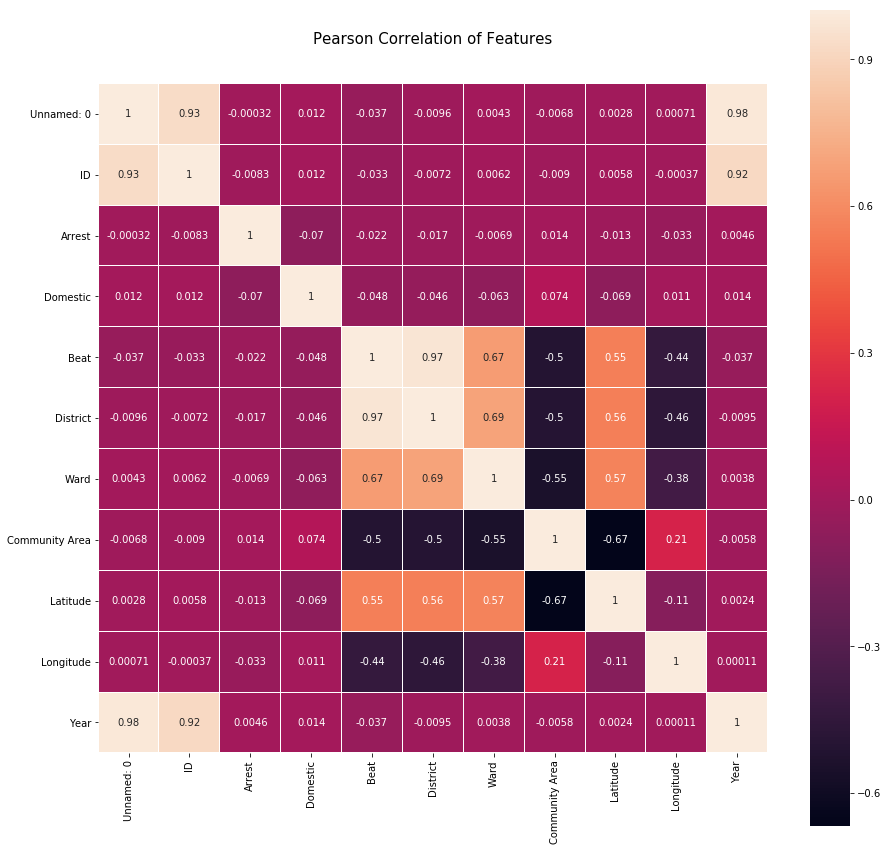

In [119]:
#creating heatmap for entire code
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [95]:
crimebin

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,THEFT,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train
5,333192,7810523,HS620548,11/17/2010 10:30,077XX S SOUTH SHORE DR,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,421,4,7,43,5,42,-88,2010,train
6,1426734,9553552,HX205552,3/31/2014 0:01,033XX W FRANKLIN BLVD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,1121,11,28,23,7,42,-88,2014,train
7,1300180,9336715,HW480384,10/5/2013 4:15,002XX E 121ST PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,532,5,9,53,14,42,-88,2013,train
8,90734,7439846,HS242094,4/4/2010 20:45,074XX N CLARK ST,890,THEFT,FROM BUILDING,NURSING HOME/RETIREMENT HOME,False,False,2422,24,49,1,6,42,-88,2010,train
9,1028186,8899858,HV574003,11/23/2012 16:00,048XX S LAFLIN ST,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,False,933,9,20,61,26,42,-88,2012,train


In [55]:
#Iterating ove rrows in the dataframe
for index, row in crimebin.iterrows():
    print(row['Primary Type'])


CRIMINAL DAMAGE
WEAPONS VIOLATION
BATTERY
ROBBERY
THEFT
BURGLARY
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
THEFT
OFFENSE INVOLVING CHILDREN
THEFT
ASSAULT
MOTOR VEHICLE THEFT
THEFT
THEFT
BATTERY
THEFT
THEFT
ASSAULT
BATTERY
THEFT
NARCOTICS
ASSAULT
NARCOTICS
THEFT
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
BURGLARY
THEFT
BATTERY
CRIMINAL DAMAGE
ASSAULT
BATTERY
ROBBERY
BATTERY
BURGLARY
THEFT
THEFT
THEFT
ASSAULT
BATTERY
THEFT
BATTERY
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
OTHER OFFENSE
THEFT
BURGLARY
ROBBERY
THEFT
CRIMINAL TRESPASS
THEFT
THEFT
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
THEFT
BATTERY
CRIMINAL TRESPASS
THEFT
OTHER OFFENSE
ROBBERY
NARCOTICS
BATTERY
DECEPTIVE PRACTICE
BATTERY
NARCOTICS
ASSAULT
CRIMINAL DAMAGE
BATTERY
NARCOTICS
BURGLARY
BURGLARY
ASSAULT
CRIMINAL DAMAGE
THEFT
BURGLARY
ASSAULT
BATTERY
NARCOTICS
OTHER OFFENSE
THEFT
ROBBERY
ROBBERY
THEFT
NARCOTICS
BURGLARY
BATTERY
THEFT
OTHER OFFENSE
BURGLARY
ASSAULT
CRIMINAL TRESPASS
NARCOTICS
CRIMINAL TRESPASS
ASSAULT
CRIMINAL DAMAGE
BATTERY
CRIMIN

BATTERY
BATTERY
BATTERY
BURGLARY
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
ASSAULT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
NARCOTICS
ROBBERY
OTHER OFFENSE
ASSAULT
CRIMINAL DAMAGE
ROBBERY
THEFT
MOTOR VEHICLE THEFT
THEFT
THEFT
NARCOTICS
OTHER OFFENSE
OTHER OFFENSE
OTHER OFFENSE
THEFT
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
BURGLARY
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
BURGLARY
CRIMINAL DAMAGE
BURGLARY
THEFT
SEX OFFENSE
OTHER OFFENSE
DECEPTIVE PRACTICE
ASSAULT
BATTERY
BATTERY
CRIMINAL DAMAGE
BURGLARY
DECEPTIVE PRACTICE
OTHER OFFENSE
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
CRIMINAL TRESPASS
BATTERY
BATTERY
NARCOTICS
NARCOTICS
NARCOTICS
BATTERY
CRIMINAL DAMAGE
NARCOTICS
BURGLARY
THEFT
NARCOTICS
NARCOTICS
BATTERY
BATTERY
BATTERY
THEFT
ROBBERY
OTHER OFFENSE
NARCOTICS
CRIMINAL DAMAGE
BURGLARY
NARCOTICS
OTHER OFFENSE
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
BATTERY
DECEPTIVE PRACTICE
BATTERY
ASSAULT
ROBBERY
DECEPTIVE PRACTICE
NARCOTICS
ASSAULT
CRIMINAL DAMAGE
THEFT
NARCOTICS
BATTERY
MO

BATTERY
BATTERY
THEFT
THEFT
BURGLARY
BATTERY
NARCOTICS
BURGLARY
ASSAULT
THEFT
BURGLARY
ROBBERY
BATTERY
NARCOTICS
THEFT
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
THEFT
ASSAULT
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
MOTOR VEHICLE THEFT
PROSTITUTION
THEFT
MOTOR VEHICLE THEFT
NARCOTICS
WEAPONS VIOLATION
DECEPTIVE PRACTICE
BATTERY
BATTERY
BATTERY
THEFT
NARCOTICS
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
CRIMINAL TRESPASS
THEFT
BATTERY
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
OFFENSE INVOLVING CHILDREN
ASSAULT
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
NARCOTICS
DECEPTIVE PRACTICE
THEFT
BURGLARY
BATTERY
ASSAULT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
MOTOR VEHICLE THEFT
NARCOTICS
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
BATTERY
MOTOR VEHICLE THEFT
BURGLARY
THEFT
BURGLARY
DECEPTIVE PRACTICE
BATTERY
BURGLARY
BATTERY
BATTERY
OTHER OFFENSE
CRIMINAL DAMAGE
THEFT
CRIMINAL DA

THEFT
ASSAULT
THEFT
BATTERY
BATTERY
BATTERY
PUBLIC PEACE VIOLATION
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
OTHER OFFENSE
BURGLARY
BURGLARY
OTHER OFFENSE
THEFT
THEFT
THEFT
ROBBERY
BURGLARY
ROBBERY
OTHER OFFENSE
OFFENSE INVOLVING CHILDREN
BURGLARY
BATTERY
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
OTHER OFFENSE
THEFT
NARCOTICS
BATTERY
NARCOTICS
BATTERY
BATTERY
MOTOR VEHICLE THEFT
BATTERY
BATTERY
BATTERY
CRIMINAL TRESPASS
THEFT
THEFT
NARCOTICS
ASSAULT
THEFT
CRIMINAL TRESPASS
THEFT
THEFT
PROSTITUTION
THEFT
NARCOTICS
BATTERY
BATTERY
THEFT
BURGLARY
NARCOTICS
CRIMINAL DAMAGE
ROBBERY
NARCOTICS
THEFT
THEFT
NARCOTICS
THEFT
CRIMINAL DAMAGE
BURGLARY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
THEFT
OTHER OFFENSE
BATTERY
BURGLARY
NARCOTICS
NARCOTICS
THEFT
THEFT
BATTERY
THEFT
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
OTHER OFFENSE
NARCOTICS
THEFT
OTHER OFFENSE
BATTERY
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
THEFT
THEFT
CRIMINAL TRESPASS
WEAPONS VIOLATION
NARCOTICS
BURG

THEFT
THEFT
THEFT
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
THEFT
CRIM SEXUAL ASSAULT
ROBBERY
THEFT
BATTERY
ROBBERY
ASSAULT
CRIMINAL DAMAGE
BATTERY
BATTERY
THEFT
THEFT
CRIMINAL DAMAGE
BATTERY
ROBBERY
NARCOTICS
ASSAULT
CRIMINAL DAMAGE
THEFT
THEFT
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
BURGLARY
BATTERY
BATTERY
BURGLARY
DECEPTIVE PRACTICE
THEFT
ROBBERY
ASSAULT
THEFT
CRIMINAL DAMAGE
THEFT
BATTERY
BURGLARY
NARCOTICS
BATTERY
THEFT
NARCOTICS
ASSAULT
ASSAULT
BATTERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
NARCOTICS
BATTERY
THEFT
ASSAULT
BATTERY
MOTOR VEHICLE THEFT
BURGLARY
THEFT
WEAPONS VIOLATION
ROBBERY
THEFT
MOTOR VEHICLE THEFT
ASSAULT
CRIMINAL TRESPASS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
MOTOR VEHICLE THEFT
BATTERY
THEFT
NARCOTICS
DECEPTIVE PRACTICE
ASSAULT
ARSON
DECEPTIVE PRACTICE
THEFT
INTERFERENCE WITH PUBLIC OFFICER
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ASSAULT
THEFT
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
ASSAULT
BATTERY
NARCOTICS
NARCOTICS
BATTERY
OTHER OFFEN

CRIMINAL TRESPASS
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
BATTERY
NARCOTICS
THEFT
BATTERY
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
NARCOTICS
CRIMINAL DAMAGE
BURGLARY
BURGLARY
BATTERY
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
ASSAULT
BURGLARY
BATTERY
BATTERY
CRIMINAL DAMAGE
THEFT
THEFT
BATTERY
THEFT
OTHER OFFENSE
DECEPTIVE PRACTICE
WEAPONS VIOLATION
OTHER OFFENSE
BATTERY
CRIMINAL DAMAGE
CRIMINAL TRESPASS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
CRIMINAL TRESPASS
CRIMINAL DAMAGE
BATTERY
ASSAULT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
NARCOTICS
ASSAULT
NARCOTICS
THEFT
BURGLARY
OTHER OFFENSE
WEAPONS VIOLATION
NARCOTICS
ROBBERY
DECEPTIVE PRACTICE
BATTERY
MOTOR VEHICLE THEFT
BATTERY
THEFT
NARCOTICS
ASSAULT
NARCOTICS
DECEPTIVE PRACTICE
THEFT
NARCOTICS
BATTERY
DECEPTIVE PRACTICE
THEFT
CRIMINAL DAMAGE
PROSTITUTION
PUBLIC PEACE VIOLATION
NARCOTICS
OTHER OFFENSE
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
WEAPONS VIOLATION
CRIMINAL DAMAGE
OTHER OFFENSE
RO

BATTERY
BATTERY
THEFT
THEFT
BATTERY
PROSTITUTION
ROBBERY
CRIMINAL DAMAGE
BURGLARY
CRIMINAL DAMAGE
THEFT
BURGLARY
DECEPTIVE PRACTICE
ASSAULT
THEFT
THEFT
BATTERY
BATTERY
ROBBERY
ASSAULT
THEFT
OTHER OFFENSE
BATTERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
BURGLARY
BURGLARY
BATTERY
WEAPONS VIOLATION
NARCOTICS
BATTERY
BATTERY
THEFT
THEFT
BATTERY
BATTERY
ROBBERY
CRIMINAL DAMAGE
ASSAULT
DECEPTIVE PRACTICE
OFFENSE INVOLVING CHILDREN
OTHER OFFENSE
WEAPONS VIOLATION
DECEPTIVE PRACTICE
THEFT
THEFT
BATTERY
NARCOTICS
NARCOTICS
ROBBERY
CRIMINAL TRESPASS
OTHER OFFENSE
OTHER OFFENSE
BATTERY
BATTERY
THEFT
OTHER OFFENSE
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
THEFT
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ROBBERY
ASSAULT
BURGLARY
ASSAULT
DECEPTIVE PRACTICE
OTHER OFFENSE
BATTERY
BATTERY
NARCOTICS
BATTERY
BATTERY
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
MOTOR VEHICLE THEFT
BATTERY
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
NARCO

NARCOTICS
CRIM SEXUAL ASSAULT
BATTERY
BURGLARY
BATTERY
CRIMINAL DAMAGE
BURGLARY
BATTERY
CRIMINAL DAMAGE
ROBBERY
ROBBERY
THEFT
CRIMINAL TRESPASS
NARCOTICS
BATTERY
THEFT
BURGLARY
THEFT
BATTERY
NARCOTICS
THEFT
BURGLARY
THEFT
BURGLARY
BATTERY
OTHER OFFENSE
CRIMINAL DAMAGE
ASSAULT
BATTERY
THEFT
THEFT
THEFT
THEFT
GAMBLING
DECEPTIVE PRACTICE
OTHER OFFENSE
THEFT
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
BURGLARY
THEFT
CRIMINAL DAMAGE
NARCOTICS
CRIMINAL TRESPASS
NARCOTICS
ASSAULT
ASSAULT
BATTERY
BURGLARY
ASSAULT
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
NARCOTICS
OTHER OFFENSE
BATTERY
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
BATTERY
ASSAULT
CRIMINAL TRESPASS
CRIM SEXUAL ASSAULT
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
THEFT
BATTERY
ASSAULT
ASSAULT
CRIMINAL DAMAGE
BATTERY
THEFT
BURGLARY
BATTERY
OFFENSE INVOLVING CHILDREN
OTHER OFFENSE
WEAPONS VIOLATION
NARCOTICS
BATTERY
CRIMINAL DAMAGE
THEFT
BATTERY
NARCOTICS
NARCOTICS
THEFT
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
ASSAULT
DECEPTIVE PRACTICE
OTHER OFFE

THEFT
THEFT
BATTERY
BATTERY
BATTERY
BATTERY
HOMICIDE
CRIMINAL DAMAGE
ROBBERY
BATTERY
DECEPTIVE PRACTICE
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
NARCOTICS
BURGLARY
BATTERY
BATTERY
CRIMINAL DAMAGE
THEFT
NARCOTICS
OTHER OFFENSE
THEFT
THEFT
CRIMINAL DAMAGE
NARCOTICS
THEFT
ROBBERY
BATTERY
BATTERY
THEFT
OTHER OFFENSE
BATTERY
NARCOTICS
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
ASSAULT
BURGLARY
KIDNAPPING
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
THEFT
ASSAULT
CRIMINAL DAMAGE
THEFT
CRIMINAL TRESPASS
ASSAULT
THEFT
WEAPONS VIOLATION
NARCOTICS
OTHER OFFENSE
BATTERY
BATTERY
BATTERY
ASSAULT
OTHER OFFENSE
BATTERY
BURGLARY
PUBLIC PEACE VIOLATION
OTHER OFFENSE
BATTERY
NARCOTICS
THEFT
CRIMINAL DAMAGE
ROBBERY
THEFT
ASSAULT
ASSAULT
BURGLARY
PROSTITUTION
BATTERY
CRIMINAL DAMAGE
BATTERY
NARCOTICS
CRIMINAL DAMAGE
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
NARCOTICS
THEFT
THEFT
WEAPONS VIOLATION
THEFT
CRIMINAL DAMAGE
THEFT
THEFT
BURGLARY
WEAPONS VIOLATION
BATTERY
THEFT
THEF

CRIMINAL TRESPASS
NARCOTICS
BATTERY
BATTERY
BURGLARY
THEFT
THEFT
BATTERY
THEFT
BURGLARY
BURGLARY
THEFT
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
NARCOTICS
THEFT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
NARCOTICS
CRIMINAL DAMAGE
NARCOTICS
THEFT
CRIMINAL DAMAGE
THEFT
THEFT
MOTOR VEHICLE THEFT
ASSAULT
BURGLARY
CRIM SEXUAL ASSAULT
CRIMINAL DAMAGE
THEFT
NARCOTICS
NARCOTICS
BATTERY
BATTERY
THEFT
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ROBBERY
BATTERY
THEFT
NARCOTICS
BATTERY
MOTOR VEHICLE THEFT
ASSAULT
BATTERY
BURGLARY
THEFT
ASSAULT
CRIMINAL TRESPASS
BATTERY
THEFT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
BURGLARY
BURGLARY
BATTERY
THEFT
THEFT
THEFT
NARCOTICS
OTHER OFFENSE
THEFT
THEFT
INTIMIDATION
SEX OFFENSE
BATTERY
BATTERY
NARCOTICS
BATTERY
NARCOTICS
CRIMINAL DAMAGE
BATTERY
DECEPTIVE PRACTICE
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
BATTERY
BATTERY
ROBBERY
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
NARCOTICS
THEFT
THEFT
BATTERY

ASSAULT
ROBBERY
THEFT
CRIMINAL TRESPASS
THEFT
THEFT
BATTERY
THEFT
ASSAULT
OTHER OFFENSE
DECEPTIVE PRACTICE
THEFT
WEAPONS VIOLATION
BATTERY
BATTERY
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
THEFT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
ASSAULT
NARCOTICS
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
BURGLARY
BATTERY
THEFT
DECEPTIVE PRACTICE
NARCOTICS
BURGLARY
THEFT
NARCOTICS
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
BURGLARY
ASSAULT
BATTERY
BATTERY
THEFT
MOTOR VEHICLE THEFT
THEFT
THEFT
DECEPTIVE PRACTICE
THEFT
MOTOR VEHICLE THEFT
BATTERY
THEFT
NARCOTICS
ROBBERY
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
THEFT
ROBBERY
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
THEFT
DECEPTIVE PRACTICE
THEFT
PROSTITUTION
PUBLIC PEACE VIOLATION
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
CRIMINAL TRESPASS
ASSAULT
BATTERY
CRIMINAL TRESPASS
THEFT
ASSAULT
INTERFERENCE WITH PUBLIC OFFICER
BATTERY
THEFT
CRIMINAL DAMAGE
BURGLARY
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ASSAULT


ROBBERY
THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
THEFT
NARCOTICS
ROBBERY
THEFT
ASSAULT
OTHER OFFENSE
CRIMINAL DAMAGE
BURGLARY
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
ROBBERY
DECEPTIVE PRACTICE
THEFT
PROSTITUTION
BATTERY
DECEPTIVE PRACTICE
NARCOTICS
CRIMINAL DAMAGE
BATTERY
THEFT
NARCOTICS
BURGLARY
CRIMINAL DAMAGE
STALKING
THEFT
STALKING
MOTOR VEHICLE THEFT
THEFT
ROBBERY
NARCOTICS
PROSTITUTION
DECEPTIVE PRACTICE
THEFT
NARCOTICS
OTHER OFFENSE
DECEPTIVE PRACTICE
BATTERY
THEFT
NARCOTICS
THEFT
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
OTHER OFFENSE
OTHER OFFENSE
BATTERY
BATTERY
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ASSAULT
NARCOTICS
THEFT
THEFT
ASSAULT
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
BATTERY
HOMICIDE
ASSAULT
OFFENSE INVOLVING CHILDREN
ROBBERY
NARCOTICS
OTHER OFFENSE
BATTERY
BATTERY
ASSAULT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
THEFT
THEFT
BATTERY
BURGLARY
OTHER OFFENSE
MOTOR VEHICLE

BURGLARY
NARCOTICS
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
BATTERY
BATTERY
BATTERY
CRIMINAL DAMAGE
BATTERY
ROBBERY
CRIMINAL DAMAGE
OTHER OFFENSE
CRIMINAL DAMAGE
WEAPONS VIOLATION
NARCOTICS
BURGLARY
NARCOTICS
DECEPTIVE PRACTICE
NARCOTICS
CRIMINAL DAMAGE
THEFT
BURGLARY
CRIMINAL TRESPASS
THEFT
OTHER OFFENSE
BATTERY
ASSAULT
CRIMINAL DAMAGE
NARCOTICS
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
NARCOTICS
BATTERY
THEFT
ROBBERY
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
ASSAULT
BATTERY
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
THEFT
BATTERY
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
BATTERY
THEFT
ASSAULT
ASSAULT
CRIMINAL DAMAGE
BURGLARY
BURGLARY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
THEFT
OTHER OFFENSE
BATTERY
DECEPTIVE PRACTICE
ASSAULT
ROBBERY
NARCOTICS
BATTERY
BURGLARY
WEAPONS VIOLATION
THEFT
DECEPTIVE PRACTICE
THEFT
THEFT
MOTOR VEHICLE THEFT
THEFT
BATTERY
CRIMINAL DAMAGE
OTHER OFFENSE
OTHER OFFENSE
NARCOTICS
C

THEFT
OTHER OFFENSE
WEAPONS VIOLATION
DECEPTIVE PRACTICE
BATTERY
NARCOTICS
NARCOTICS
ROBBERY
THEFT
THEFT
BATTERY
BATTERY
NARCOTICS
CRIMINAL TRESPASS
CRIMINAL TRESPASS
THEFT
THEFT
BATTERY
ASSAULT
CRIMINAL DAMAGE
ASSAULT
BURGLARY
THEFT
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
BURGLARY
BATTERY
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
PUBLIC PEACE VIOLATION
DECEPTIVE PRACTICE
NARCOTICS
NARCOTICS
NARCOTICS
BATTERY
THEFT
STALKING
OTHER OFFENSE
NARCOTICS
PUBLIC PEACE VIOLATION
THEFT
THEFT
NARCOTICS
THEFT
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
NARCOTICS
BATTERY
BURGLARY
CRIMINAL DAMAGE
BATTERY
BATTERY
NARCOTICS
THEFT
NARCOTICS
ASSAULT
BATTERY
BURGLARY
ASSAULT
DECEPTIVE PRACTICE
BURGLARY
THEFT
OFFENSE INVOLVING CHILDREN
THEFT
THEFT
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
MOTOR VEHICLE THEFT
THEFT
THEFT
BURGLARY
THEFT
ASSAULT
THEFT
ROBBERY
B

THEFT
THEFT
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
NARCOTICS
CRIMINAL DAMAGE
BATTERY
BATTERY
BATTERY
BATTERY
BURGLARY
OFFENSE INVOLVING CHILDREN
BATTERY
BATTERY
BURGLARY
DECEPTIVE PRACTICE
WEAPONS VIOLATION
BURGLARY
NARCOTICS
THEFT
BATTERY
BATTERY
DECEPTIVE PRACTICE
BURGLARY
THEFT
NARCOTICS
THEFT
NARCOTICS
MOTOR VEHICLE THEFT
BURGLARY
ASSAULT
BATTERY
BATTERY
OTHER OFFENSE
BATTERY
NARCOTICS
BATTERY
NARCOTICS
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
ROBBERY
THEFT
ROBBERY
BATTERY
THEFT
CRIMINAL DAMAGE
THEFT
BURGLARY
OTHER OFFENSE
NARCOTICS
BATTERY
OFFENSE INVOLVING CHILDREN
CRIMINAL DAMAGE
THEFT
BATTERY
BURGLARY
THEFT
THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
WEAPONS VIOLATION
OTHER OFFENSE
DECEPTIVE PRACTICE
PROSTITUTION
OTHER OFFENSE
ASSAULT
SEX OFFENSE
NARCOTICS
ASSAULT
NARCOTICS
MOTOR VEHICLE THEFT
NARCOTICS
BATTERY
CRIM SEXUAL ASSAULT
BURGLARY
THEFT
MOTOR VEHICLE THEFT
BURGLARY
NARCOTICS
BATTERY
BURGLARY
NARCOTICS
THEFT
NARCOTICS
NARCOTICS


ROBBERY
OTHER OFFENSE
CRIMINAL DAMAGE
ASSAULT
MOTOR VEHICLE THEFT
BURGLARY
ASSAULT
OTHER OFFENSE
CRIM SEXUAL ASSAULT
BURGLARY
ASSAULT
THEFT
ASSAULT
BATTERY
THEFT
CRIMINAL DAMAGE
PROSTITUTION
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
DECEPTIVE PRACTICE
ASSAULT
THEFT
NARCOTICS
THEFT
THEFT
BATTERY
BATTERY
BATTERY
BATTERY
NARCOTICS
DECEPTIVE PRACTICE
THEFT
BURGLARY
CRIMINAL DAMAGE
ROBBERY
MOTOR VEHICLE THEFT
NARCOTICS
BATTERY
ASSAULT
THEFT
NARCOTICS
BATTERY
WEAPONS VIOLATION
THEFT
BATTERY
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
NARCOTICS
ROBBERY
THEFT
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
STALKING
BATTERY
ASSAULT
DECEPTIVE PRACTICE
OTHER OFFENSE
DECEPTIVE PRACTICE
CRIM SEXUAL ASSAULT
BATTERY
CRIMINAL DAMAGE
THEFT
BURGLARY
BATTERY
THEFT
BATTERY
BATTERY
BURGLARY
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
PROSTITUTION
THEFT
ROBBERY
ROBBERY
MOTOR VEHICLE THEFT
BATTERY
NARCOTICS
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
OTHER OFFENSE
CRIMINAL

BATTERY
THEFT
CRIMINAL DAMAGE
NARCOTICS
THEFT
THEFT
BATTERY
WEAPONS VIOLATION
BATTERY
CRIMINAL DAMAGE
ASSAULT
BATTERY
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
PUBLIC PEACE VIOLATION
BURGLARY
ROBBERY
PUBLIC PEACE VIOLATION
THEFT
BURGLARY
THEFT
PUBLIC PEACE VIOLATION
BATTERY
ASSAULT
BATTERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
WEAPONS VIOLATION
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
THEFT
CRIMINAL TRESPASS
NARCOTICS
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
BATTERY
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
ASSAULT
BATTERY
MOTOR VEHICLE THEFT
BURGLARY
NARCOTICS
BURGLARY
NARCOTICS
BURGLARY
BURGLARY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
OTHER OFFENSE
BATTERY
BURGLARY
NARCOTICS
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
PUBLIC PEACE VIOLATION
WEAPONS VIOLATION
PROSTITUTION
BURGLARY
OFFENSE INVOLVING CHILDREN
BATTERY
BATTERY
ASSAULT
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
OTHER OF

BURGLARY
THEFT
THEFT
ASSAULT
THEFT
THEFT
MOTOR VEHICLE THEFT
BURGLARY
OTHER OFFENSE
PROSTITUTION
MOTOR VEHICLE THEFT
BURGLARY
DECEPTIVE PRACTICE
CRIMINAL TRESPASS
THEFT
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
THEFT
THEFT
CRIMINAL DAMAGE
ROBBERY
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
NARCOTICS
THEFT
THEFT
THEFT
CRIMINAL TRESPASS
THEFT
THEFT
BATTERY
HOMICIDE
MOTOR VEHICLE THEFT
OTHER OFFENSE
BURGLARY
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
THEFT
THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
THEFT
THEFT
BATTERY
THEFT
BATTERY
BATTERY
BATTERY
NARCOTICS
NARCOTICS
ROBBERY
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
DECEPTIVE PRACTICE
ROBBERY
PUBLIC PEACE VIOLATION
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
ASSAULT
THEFT
THEFT
BATTERY
OTHER OFFENSE
BATTERY
OTHER OFFENSE
THEFT
OTHER OFFENSE
NARCOTICS
BATTERY
THEFT
THEFT
NARCOTICS
THEFT
BATTERY
INTERFERENCE WITH PUBLIC OFFICER
BATTERY
CRIMINAL DA

BATTERY
BATTERY
BATTERY
THEFT
BATTERY
CRIMINAL TRESPASS
BATTERY
CRIMINAL TRESPASS
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
THEFT
CRIMINAL DAMAGE
NARCOTICS
DECEPTIVE PRACTICE
THEFT
THEFT
THEFT
NARCOTICS
THEFT
CRIMINAL TRESPASS
PROSTITUTION
BATTERY
THEFT
NARCOTICS
BATTERY
THEFT
BURGLARY
BATTERY
OTHER OFFENSE
BATTERY
ASSAULT
ASSAULT
THEFT
OFFENSE INVOLVING CHILDREN
BATTERY
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
THEFT
NARCOTICS
BATTERY
OTHER OFFENSE
BATTERY
ROBBERY
ASSAULT
BURGLARY
BATTERY
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
THEFT
OTHER OFFENSE
BATTERY
BATTERY
THEFT
NARCOTICS
THEFT
NARCOTICS
BURGLARY
THEFT
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
WEAPONS VIOLATION
BATTERY
ASSAULT
ASSAULT
NARCOTICS
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
BATTERY
THEFT
THEFT
NARCOTICS
THEFT
BURGLARY
BATTERY
NARCOTICS
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
BATTERY
NARCOTICS
BURGLARY
CRIMINAL TRESPASS
CRIMINAL DAMAGE
OTHER OFFENSE
MOTOR VEHICLE THEFT
BURGLARY
ASSAULT
NARCOTICS
OTHER OFFENSE
OTHER OFF

MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
NARCOTICS
THEFT
THEFT
BATTERY
BATTERY
NARCOTICS
MOTOR VEHICLE THEFT
NARCOTICS
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
OTHER OFFENSE
NARCOTICS
ROBBERY
THEFT
BATTERY
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
NARCOTICS
THEFT
STALKING
DECEPTIVE PRACTICE
THEFT
NARCOTICS
THEFT
NARCOTICS
THEFT
ROBBERY
BATTERY
THEFT
BATTERY
NARCOTICS
OTHER OFFENSE
THEFT
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
NARCOTICS
THEFT
BURGLARY
THEFT
THEFT
THEFT
BATTERY
BATTERY
THEFT
THEFT
ASSAULT
NARCOTICS
BATTERY
BATTERY
BATTERY
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
THEFT
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
THEFT
BATTERY
BURGLARY
PUBLIC PEACE VIOLATION
BURGLARY
THEFT
CRIMINAL DAMAGE
ASSAULT
BURGLARY
MOTOR VEHICLE THEFT
ASSAULT
THEFT
THEFT
BATTERY
BATTERY
THEFT
BURGLARY
CRIMINAL DAMAGE
NARCOTICS
BURGLARY
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
BATTERY
THEFT
NARCOTICS
BATTERY
CRIMINAL DAMAGE
BATTERY
THEFT
DECEPTIVE PRACTICE
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
PUBLIC PEACE VIOLA

BATTERY
BATTERY
MOTOR VEHICLE THEFT
ROBBERY
CRIMINAL DAMAGE
BURGLARY
NARCOTICS
BATTERY
ROBBERY
ASSAULT
BURGLARY
THEFT
OTHER OFFENSE
ASSAULT
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
OTHER OFFENSE
BATTERY
BURGLARY
OTHER OFFENSE
BATTERY
THEFT
THEFT
ASSAULT
NARCOTICS
OTHER OFFENSE
CRIMINAL TRESPASS
THEFT
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
ROBBERY
CRIMINAL DAMAGE
BURGLARY
NARCOTICS
BATTERY
ASSAULT
THEFT
PROSTITUTION
THEFT
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
THEFT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
THEFT
NARCOTICS
CRIM SEXUAL ASSAULT
ROBBERY
BATTERY
THEFT
THEFT
CRIMINAL DAMAGE
THEFT
THEFT
BATTERY
BATTERY
NARCOTICS
PUBLIC PEACE VIOLATION
BATTERY
ROBBERY
BURGLARY
BATTERY
CRIMINAL DAMAGE
NARCOTICS
DECEPTIVE PRACTICE
ROBBERY
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
BATTERY
ROBBERY
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
CRIMINAL DAMAGE
NARCOTICS
THEFT
ASSAULT
NARCOTICS
THEFT
BATTERY
BATTERY
CRIMINAL DAMAGE
THEFT
NARCOTICS
CRIMINAL 

THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
BATTERY
BATTERY
BURGLARY
DECEPTIVE PRACTICE
OTHER OFFENSE
BATTERY
BATTERY
NARCOTICS
THEFT
BURGLARY
BATTERY
THEFT
WEAPONS VIOLATION
BATTERY
BATTERY
OTHER OFFENSE
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
BATTERY
BATTERY
BATTERY
ASSAULT
BATTERY
BURGLARY
BATTERY
BATTERY
BURGLARY
ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
THEFT
BATTERY
OTHER OFFENSE
PROSTITUTION
THEFT
CRIMINAL DAMAGE
THEFT
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
THEFT
OTHER OFFENSE
BATTERY
DECEPTIVE PRACTICE
OTHER OFFENSE
BURGLARY
INTERFERENCE WITH PUBLIC OFFICER
THEFT
OTHER OFFENSE
WEAPONS VIOLATION
BATTERY
BURGLARY
BATTERY
BATTERY
NARCOTICS
CRIMINAL TRESPASS
CRIMINAL DAMAGE
NARCOTICS
BURGLARY
THEFT
WEAPONS VIOLATION
BATTERY
BATTERY
THEFT
CRIMINAL DAMAGE
GAMBLING
BATTERY
WEAPONS VIOLATION
NARCOTICS
DECEPTIVE PRACTICE
ASSAULT
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
BATTERY
NARCOTICS
CRIMINAL DAMAGE
THEFT
NARCOTICS
THEFT
CRIMINAL DAMAGE
ROBBERY
BURGLARY
BATTERY
THEFT
MOTOR VEHICLE

CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
DECEPTIVE PRACTICE
THEFT
BATTERY
MOTOR VEHICLE THEFT
ROBBERY
BATTERY
THEFT
PROSTITUTION
NARCOTICS
BATTERY
BATTERY
ASSAULT
INTERFERENCE WITH PUBLIC OFFICER
ASSAULT
NARCOTICS
ASSAULT
THEFT
ASSAULT
CRIMINAL DAMAGE
OTHER OFFENSE
DECEPTIVE PRACTICE
BURGLARY
MOTOR VEHICLE THEFT
NARCOTICS
THEFT
ROBBERY
BATTERY
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
BATTERY
PUBLIC PEACE VIOLATION
ASSAULT
ASSAULT
BATTERY
BURGLARY
THEFT
THEFT
NARCOTICS
MOTOR VEHICLE THEFT
ASSAULT
BURGLARY
THEFT
BATTERY
OTHER OFFENSE
DECEPTIVE PRACTICE
THEFT
THEFT
THEFT
THEFT
SEX OFFENSE
NARCOTICS
CRIMINAL DAMAGE
THEFT
NARCOTICS
LIQUOR LAW VIOLATION
ASSAULT
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
THEFT
BATTERY
GAMBLING
CRIMINAL DAMAGE
THEFT
THEFT
OTHER OFFENSE
THEFT
BATTERY
OTHER OFFENSE
CRIMINAL TRESPASS
BATTERY
OTHER OFFENSE
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
BATTERY
OTHER OFFENSE
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ASSAULT
PUBLIC PEACE VIOL

THEFT
OTHER OFFENSE
KIDNAPPING
NARCOTICS
THEFT
BATTERY
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
BATTERY
BATTERY
BATTERY
THEFT
CRIMINAL DAMAGE
OFFENSE INVOLVING CHILDREN
DECEPTIVE PRACTICE
BATTERY
ROBBERY
BATTERY
BATTERY
ASSAULT
PUBLIC PEACE VIOLATION
THEFT
BATTERY
THEFT
BATTERY
OFFENSE INVOLVING CHILDREN
THEFT
INTIMIDATION
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
CRIMINAL TRESPASS
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
BURGLARY
BATTERY
NARCOTICS
BATTERY
ASSAULT
BURGLARY
THEFT
THEFT
ASSAULT
THEFT
DECEPTIVE PRACTICE
THEFT
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
LIQUOR LAW VIOLATION
THEFT
OTHER OFFENSE
THEFT
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
OTHER OFFENSE
NARCOTICS
THEFT
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
BATTERY
THEFT
ASSAULT
MOTOR VEHICLE THEFT
BATTERY
BATTERY
THEFT
CRIMINAL DAMAGE
CRIMINAL TRESPASS
THEFT
THEFT
OTHER OFFENSE
THEFT
BATTERY
BATTERY
OTHER OFFENSE
BATTERY
THEFT
CRIMINAL TR

OTHER OFFENSE
BATTERY
THEFT
DECEPTIVE PRACTICE
ARSON
THEFT
THEFT
CRIMINAL DAMAGE
THEFT
DECEPTIVE PRACTICE
THEFT
MOTOR VEHICLE THEFT
THEFT
THEFT
CRIMINAL DAMAGE
BATTERY
BATTERY
CRIM SEXUAL ASSAULT
THEFT
BATTERY
BATTERY
NARCOTICS
BURGLARY
THEFT
CRIMINAL TRESPASS
BATTERY
MOTOR VEHICLE THEFT
ASSAULT
BATTERY
THEFT
BATTERY
NARCOTICS
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
NARCOTICS
NARCOTICS
ROBBERY
THEFT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
THEFT
THEFT
ASSAULT
BATTERY
NARCOTICS
ASSAULT
ASSAULT
THEFT
ROBBERY
THEFT
BATTERY
BURGLARY
CRIMINAL TRESPASS
NARCOTICS
DECEPTIVE PRACTICE
BATTERY
BATTERY
THEFT
BATTERY
BATTERY
BURGLARY
BATTERY
NARCOTICS
OTHER OFFENSE
THEFT
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
CRIMINAL TRESPASS
THEFT
THEFT
BATTERY
BATTERY
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
DECEPTIVE PRACTICE
BATTERY
THEFT
THEFT
MOTOR VEHICLE THEFT
NARCOTICS
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
THEFT
ASSAULT
ASSAULT
THEFT
BATTERY
ASSA

THEFT
ARSON
THEFT
BURGLARY
THEFT
THEFT
THEFT
BATTERY
BURGLARY
NARCOTICS
THEFT
BATTERY
BATTERY
BATTERY
BATTERY
THEFT
BATTERY
BATTERY
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
BATTERY
ASSAULT
MOTOR VEHICLE THEFT
CRIM SEXUAL ASSAULT
THEFT
ROBBERY
BATTERY
THEFT
THEFT
OTHER OFFENSE
MOTOR VEHICLE THEFT
OFFENSE INVOLVING CHILDREN
ROBBERY
BATTERY
NARCOTICS
BATTERY
THEFT
NARCOTICS
BATTERY
BURGLARY
OTHER OFFENSE
THEFT
THEFT
THEFT
BATTERY
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
THEFT
ARSON
THEFT
THEFT
THEFT
MOTOR VEHICLE THEFT
BURGLARY
PUBLIC PEACE VIOLATION
ROBBERY
BATTERY
PROSTITUTION
BATTERY
BURGLARY
CRIMINAL DAMAGE
BATTERY
BURGLARY
BURGLARY
MOTOR VEHICLE THEFT
ASSAULT
BATTERY
BATTERY
PUBLIC PEACE VIOLATION
BATTERY
BATTERY
THEFT
THEFT
BURGLARY
BATTERY
NARCOTICS
THEFT
BATTERY
THEFT
THEFT
BURGLARY
THEFT
BATTERY
CRIMINAL DAMAGE
BATTERY
MOTOR VEHICLE THEFT
ROBBERY
ROBBERY
ASSAULT
CRIMINAL TRESPASS
THEFT
THEFT
ROBBERY
THEFT
BATTERY
CRIMINAL DAMAGE
BURGLARY
THEFT
NARCOTICS
NARCOTICS
BATTERY
THEFT
THEFT
BATTER

CRIMINAL TRESPASS
CRIM SEXUAL ASSAULT
BATTERY
THEFT
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
THEFT
OTHER OFFENSE
NARCOTICS
DECEPTIVE PRACTICE
NARCOTICS
THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
THEFT
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
BATTERY
BATTERY
THEFT
MOTOR VEHICLE THEFT
INTERFERENCE WITH PUBLIC OFFICER
THEFT
CRIMINAL DAMAGE
NARCOTICS
CRIMINAL DAMAGE
PUBLIC PEACE VIOLATION
DECEPTIVE PRACTICE
OTHER OFFENSE
BATTERY
WEAPONS VIOLATION
ROBBERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
THEFT
THEFT
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
BATTERY
NARCOTICS
NARCOTICS
ROBBERY
CRIMINAL DAMAGE
THEFT
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
ASSAULT
THEFT
BATTERY
OTHER OFFENSE
THEFT
CRIMINAL DAMAGE
NARCOTICS
BATTERY
THEFT
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
THEFT
OTHER OFFENSE
OTHER OFFENSE
THEFT
CRIMINAL DAMAGE
BATTERY
THEFT
BURGLARY
BATTERY
OTHER OFFENSE
B

THEFT
THEFT
BATTERY
NARCOTICS
THEFT
THEFT
INTERFERENCE WITH PUBLIC OFFICER
BATTERY
THEFT
ROBBERY
THEFT
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
OTHER OFFENSE
BATTERY
SEX OFFENSE
ROBBERY
BATTERY
THEFT
BATTERY
BURGLARY
CRIMINAL DAMAGE
THEFT
THEFT
NARCOTICS
OTHER OFFENSE
ASSAULT
NARCOTICS
ASSAULT
THEFT
CRIMINAL DAMAGE
BATTERY
THEFT
DECEPTIVE PRACTICE
NARCOTICS
THEFT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
ROBBERY
THEFT
NARCOTICS
BATTERY
THEFT
THEFT
THEFT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
ROBBERY
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
ROBBERY
THEFT
OTHER OFFENSE
BATTERY
BATTERY
BATTERY
MOTOR VEHICLE THEFT
BATTERY
MOTOR VEHICLE THEFT
ROBBERY
THEFT
BATTERY
THEFT
LIQUOR LAW VIOLATION
BATTERY
OTHER OFFENSE
THEFT
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
BURGLARY
OTHER OFFENSE
THEFT
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
ASSAULT
BATTERY
NARCOTICS
THEFT
NARCOTICS
OTHER OFFENSE
ROBBERY
BATTERY
A

THEFT
BURGLARY
THEFT
ASSAULT
THEFT
CRIMINAL DAMAGE
ASSAULT
OTHER OFFENSE
THEFT
OTHER OFFENSE
BATTERY
BATTERY
NARCOTICS
BATTERY
CRIMINAL TRESPASS
BATTERY
DECEPTIVE PRACTICE
NARCOTICS
BATTERY
OTHER OFFENSE
CRIMINAL DAMAGE
THEFT
THEFT
BATTERY
OTHER OFFENSE
THEFT
BATTERY
CRIMINAL DAMAGE
PUBLIC PEACE VIOLATION
DECEPTIVE PRACTICE
THEFT
CRIMINAL DAMAGE
NARCOTICS
BURGLARY
THEFT
PUBLIC PEACE VIOLATION
BURGLARY
ROBBERY
NARCOTICS
THEFT
THEFT
NARCOTICS
PUBLIC PEACE VIOLATION
THEFT
DECEPTIVE PRACTICE
ROBBERY
THEFT
THEFT
NARCOTICS
BATTERY
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
NARCOTICS
BATTERY
BATTERY
BATTERY
ASSAULT
NARCOTICS
ROBBERY
ASSAULT
INTERFERENCE WITH PUBLIC OFFICER
ROBBERY
BURGLARY
THEFT
BATTERY
THEFT
NARCOTICS
THEFT
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
THEFT
THEFT
BATTERY
NARCOTICS
BATTERY
BATTERY
BATTERY
GAMBLING
BATTERY
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
BATTERY
ASSAULT
THEFT
NARCOTICS
BATTERY
BATTERY
NARCOTICS
THEFT
BURGLARY
BATTERY
CRIMINAL DAMAGE
NARCOTICS
WEAPONS 

THEFT
MOTOR VEHICLE THEFT
ASSAULT
NARCOTICS
ROBBERY
NARCOTICS
ASSAULT
BURGLARY
BATTERY
BATTERY
BURGLARY
BATTERY
NARCOTICS
SEX OFFENSE
DECEPTIVE PRACTICE
BATTERY
BURGLARY
ROBBERY
THEFT
ASSAULT
CRIMINAL DAMAGE
BATTERY
THEFT
BATTERY
NARCOTICS
ROBBERY
THEFT
NARCOTICS
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
ASSAULT
BATTERY
ROBBERY
ASSAULT
NARCOTICS
BATTERY
THEFT
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
ASSAULT
BATTERY
OTHER OFFENSE
NARCOTICS
NARCOTICS
ROBBERY
NARCOTICS
NARCOTICS
ROBBERY
THEFT
BATTERY
THEFT
THEFT
BURGLARY
BURGLARY
OTHER OFFENSE
BATTERY
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
THEFT
OTHER OFFENSE
THEFT
BATTERY
THEFT
ASSAULT
BATTERY
NARCOTICS
THEFT
ASSAULT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
BURGLARY
NARCOTICS
ROBBERY
BURGLARY
ASSAULT
NARCOTICS
CRIMINAL DAMAGE
THEFT
BURGLARY
DECEPTIVE PRACTICE
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ROBBERY
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
THEFT
ASSAULT
THEFT
BATTERY
WEAPONS VIOLATION
BATTERY
CRIMINAL DAMAGE
THEF

THEFT
BATTERY
THEFT
THEFT
CRIMINAL DAMAGE
THEFT
ASSAULT
NARCOTICS
BATTERY
BATTERY
BATTERY
THEFT
BATTERY
THEFT
ASSAULT
BATTERY
BURGLARY
THEFT
BATTERY
BATTERY
THEFT
BURGLARY
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
THEFT
THEFT
BURGLARY
THEFT
BATTERY
NARCOTICS
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
BURGLARY
THEFT
CRIMINAL DAMAGE
BATTERY
BATTERY
BATTERY
BATTERY
BATTERY
CRIMINAL TRESPASS
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
THEFT
BATTERY
THEFT
MOTOR VEHICLE THEFT
BATTERY
CRIMINAL TRESPASS
ROBBERY
ASSAULT
BATTERY
THEFT
NARCOTICS
OTHER OFFENSE
THEFT
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
ASSAULT
THEFT
BATTERY
THEFT
INTERFERENCE WITH PUBLIC OFFICER
THEFT
DECEPTIVE PRACTICE
NARCOTICS
ASSAULT
DECEPTIVE PRACTICE
NARCOTICS
CRIMINAL DAMAGE
THEFT
ASSAULT
PUBLIC PEACE VIOLATION
OTHER OFFENSE
BATTERY
THEFT
BURGLARY
ASSAULT
OTHER OFFENSE
BATTERY
THEFT
CRIMINAL DAMAGE
OFFENSE INVOLVING CHILDREN
ROBBERY
NARCOTICS
BATTERY
GAMBLING
ASSAULT
CRIM

BATTERY
NARCOTICS
BATTERY
PROSTITUTION
CRIMINAL DAMAGE
BURGLARY
CRIMINAL DAMAGE
OTHER OFFENSE
NARCOTICS
BURGLARY
NARCOTICS
THEFT
THEFT
NARCOTICS
THEFT
DECEPTIVE PRACTICE
BURGLARY
THEFT
OTHER OFFENSE
BURGLARY
THEFT
ROBBERY
ROBBERY
THEFT
OTHER OFFENSE
DECEPTIVE PRACTICE
THEFT
OFFENSE INVOLVING CHILDREN
BATTERY
MOTOR VEHICLE THEFT
THEFT
DECEPTIVE PRACTICE
THEFT
THEFT
THEFT
CRIMINAL TRESPASS
NARCOTICS
BATTERY
THEFT
NARCOTICS
NARCOTICS
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
WEAPONS VIOLATION
CRIMINAL DAMAGE
ROBBERY
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
ASSAULT
NARCOTICS
THEFT
BATTERY
DECEPTIVE PRACTICE
BATTERY
BATTERY
THEFT
BURGLARY
BATTERY
OTHER OFFENSE
ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
NARCOTICS
BATTERY
CRIMINAL DAMAGE
BATTERY
OFFENSE INVOLVING CHILDREN
THEFT
ASSAULT
THEFT
BATTERY
BURGLARY
THEFT
THEFT
BURGLARY
BATTERY
THEFT
BATTERY
ASSAULT
BATTERY
NARCOTICS
THEFT
OTHER OFFENSE
THEFT
OTHER OFFENSE
BATTERY
NARCOTICS
BATTERY
THEFT
BATTERY
OTHER OFFE

OTHER OFFENSE
ASSAULT
BATTERY
THEFT
BURGLARY
BURGLARY
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
NARCOTICS
BATTERY
NARCOTICS
DECEPTIVE PRACTICE
BATTERY
BATTERY
BURGLARY
CRIMINAL TRESPASS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
BURGLARY
THEFT
CRIMINAL DAMAGE
THEFT
THEFT
GAMBLING
CRIMINAL DAMAGE
THEFT
BURGLARY
OFFENSE INVOLVING CHILDREN
CRIMINAL DAMAGE
THEFT
NARCOTICS
THEFT
THEFT
NARCOTICS
BATTERY
THEFT
ASSAULT
THEFT
BATTERY
THEFT
BURGLARY
BATTERY
THEFT
BURGLARY
CRIMINAL DAMAGE
NARCOTICS
BATTERY
THEFT
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
OTHER OFFENSE
BATTERY
OTHER OFFENSE
THEFT
BATTERY
ROBBERY
CRIMINAL DAMAGE
ASSAULT
THEFT
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
BATTERY
ROBBERY
BATTERY
THEFT
ASSAULT
THEFT
ROBBERY
STALKING
THEFT
THEFT
CRIMINAL DAMAGE
ROBBERY
BATTERY
THEFT
NARCOTICS
NARCOTICS
OTHER OFFENSE
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
NARCOTICS
THEFT
DECEPTIVE PRACTICE
THEFT
BATTERY
NARCOTICS
ASSAULT
OTHER OFFENSE
THEFT
PUBLIC PEACE VIOLATION
OTHER OFFENSE
BURGLARY
BAT

THEFT
THEFT
OTHER OFFENSE
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
ASSAULT
THEFT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
OTHER OFFENSE
BURGLARY
THEFT
BATTERY
DECEPTIVE PRACTICE
THEFT
NARCOTICS
SEX OFFENSE
THEFT
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
ASSAULT
DECEPTIVE PRACTICE
CRIMINAL TRESPASS
BATTERY
CRIMINAL DAMAGE
BATTERY
ROBBERY
THEFT
BATTERY
ROBBERY
CRIMINAL DAMAGE
NARCOTICS
DECEPTIVE PRACTICE
CRIMINAL TRESPASS
THEFT
BATTERY
PROSTITUTION
BATTERY
MOTOR VEHICLE THEFT
ROBBERY
THEFT
THEFT
BATTERY
BATTERY
NARCOTICS
CRIMINAL DAMAGE
ROBBERY
ROBBERY
BATTERY
BURGLARY
THEFT
BATTERY
NARCOTICS
ROBBERY
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
NARCOTICS
BATTERY
ASSAULT
BATTERY
THEFT
BURGLARY
LIQUOR LAW VIOLATION
BATTERY
ROBBERY
ASSAULT
BATTERY
CRIMINAL DAMAGE
OTHER OFFENSE
OTHER OFFENSE
ROBBERY
BATTERY
CRIMINAL DAMAGE
THEFT
CRIM SEXUAL ASSAULT
THEFT
ROBBERY
BATTERY
MOTOR VEHICLE THEFT
PROSTITUTION
BATTERY
BURGLARY
BATTERY
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
ROBBERY
DECEPTIVE PRACTI

OTHER OFFENSE
BATTERY
ASSAULT
BURGLARY
THEFT
NARCOTICS
THEFT
BATTERY
NARCOTICS
THEFT
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
THEFT
BURGLARY
THEFT
CRIMINAL DAMAGE
BATTERY
NARCOTICS
CRIMINAL DAMAGE
OFFENSE INVOLVING CHILDREN
BATTERY
BATTERY
CRIMINAL DAMAGE
ASSAULT
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
ASSAULT
BATTERY
BATTERY
BATTERY
BATTERY
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
OTHER OFFENSE
ASSAULT
CRIMINAL DAMAGE
ASSAULT
ASSAULT
CRIMINAL DAMAGE
BURGLARY
DECEPTIVE PRACTICE
BATTERY
ROBBERY
THEFT
OFFENSE INVOLVING CHILDREN
THEFT
BATTERY
NARCOTICS
THEFT
BATTERY
ASSAULT
OTHER OFFENSE
OTHER OFFENSE
BATTERY
THEFT
THEFT
CRIMINAL DAMAGE
BATTERY
WEAPONS VIOLATION
THEFT
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
THEFT
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
BURGLARY
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
PUBLIC PEACE VIOLATION
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
BATTERY
CRIMINAL DAMAGE
BATTERY
DECEPTIVE PRACTICE
THE

THEFT
NARCOTICS
ASSAULT
BURGLARY
THEFT
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
BATTERY
ASSAULT
THEFT
THEFT
THEFT
BATTERY
NARCOTICS
WEAPONS VIOLATION
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
INTERFERENCE WITH PUBLIC OFFICER
ROBBERY
THEFT
ROBBERY
NARCOTICS
CRIMINAL DAMAGE
THEFT
BATTERY
ROBBERY
THEFT
ASSAULT
OTHER OFFENSE
BATTERY
BATTERY
BATTERY
CRIMINAL TRESPASS
THEFT
BURGLARY
CRIMINAL DAMAGE
PUBLIC PEACE VIOLATION
CRIMINAL DAMAGE
BATTERY
PUBLIC PEACE VIOLATION
BURGLARY
ROBBERY
BATTERY
THEFT
DECEPTIVE PRACTICE
BATTERY
BURGLARY
CRIMINAL DAMAGE
ASSAULT
ROBBERY
NARCOTICS
THEFT
CRIMINAL TRESPASS
BATTERY
CRIMINAL DAMAGE
CRIMINAL TRESPASS
THEFT
DECEPTIVE PRACTICE
THEFT
WEAPONS VIOLATION
BATTERY
DECEPTIVE PRACTICE
BATTERY
THEFT
ROBBERY
BATTERY
DECEPTIVE PRACTICE
THEFT
BATTERY
BURGLARY
THEFT
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
ASSAULT
CRIMINAL TRESPASS
THEFT
THEFT
BATTERY
OFFENSE INVOLVING CHILDREN
WEAPONS VIOLATION
BATTERY
BATTERY
ASSAULT
THEFT
DECEPTIVE PRACTICE
THEFT
BATTERY
BURGLA

ASSAULT
BATTERY
THEFT
ASSAULT
WEAPONS VIOLATION
THEFT
PROSTITUTION
ASSAULT
CRIMINAL TRESPASS
THEFT
BATTERY
BATTERY
BURGLARY
DECEPTIVE PRACTICE
BATTERY
THEFT
THEFT
BURGLARY
CRIMINAL DAMAGE
BATTERY
BATTERY
MOTOR VEHICLE THEFT
BATTERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
THEFT
BATTERY
THEFT
ARSON
NARCOTICS
NARCOTICS
BATTERY
THEFT
OFFENSE INVOLVING CHILDREN
OTHER OFFENSE
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
THEFT
BURGLARY
BATTERY
THEFT
CRIMINAL DAMAGE
CRIMINAL TRESPASS
BATTERY
THEFT
THEFT
PUBLIC PEACE VIOLATION
THEFT
BURGLARY
DECEPTIVE PRACTICE
OFFENSE INVOLVING CHILDREN
BATTERY
NARCOTICS
BURGLARY
BATTERY
BATTERY
BATTERY
ASSAULT
INTERFERENCE WITH PUBLIC OFFICER
BATTERY
BURGLARY
MOTOR VEHICLE THEFT
ROBBERY
OTHER OFFENSE
ASSAULT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
NARCOTICS
ASSAULT
CRIM SEXUAL ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
NARCOTICS
PROSTITUTION
WEAPONS V

BATTERY
ASSAULT
THEFT
CRIMINAL DAMAGE
CRIMINAL TRESPASS
OTHER OFFENSE
THEFT
NARCOTICS
OTHER OFFENSE
THEFT
DECEPTIVE PRACTICE
BATTERY
PUBLIC PEACE VIOLATION
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
BATTERY
BATTERY
BATTERY
NARCOTICS
NARCOTICS
WEAPONS VIOLATION
THEFT
MOTOR VEHICLE THEFT
THEFT
BATTERY
THEFT
CRIMINAL DAMAGE
CRIMINAL TRESPASS
NARCOTICS
NARCOTICS
CRIMINAL TRESPASS
BATTERY
THEFT
NARCOTICS
BURGLARY
DECEPTIVE PRACTICE
BATTERY
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
THEFT
DECEPTIVE PRACTICE
BATTERY
BATTERY
ROBBERY
ROBBERY
DECEPTIVE PRACTICE
NARCOTICS
BATTERY
CRIMINAL DAMAGE
BATTERY
THEFT
BURGLARY
THEFT
DECEPTIVE PRACTICE
NARCOTICS
BATTERY
THEFT
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
THEFT
NARCOTICS
ASSAULT
THEFT
THEFT
BATTERY
BURGLARY
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
DECEPTIVE PRACTICE
THEFT
NARCOTICS
OTHER OFFENSE
THEFT
NARCOTICS
THEFT
THEFT
OFFENSE INVOLVING CHILDREN
DECEPTIVE PRACTICE
NARCOTICS
PROSTITUTION
BURGLARY
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
BURGLARY
THEFT


BATTERY
ROBBERY
BURGLARY
ROBBERY
THEFT
NARCOTICS
CRIMINAL TRESPASS
OFFENSE INVOLVING CHILDREN
CRIMINAL DAMAGE
THEFT
ROBBERY
NARCOTICS
OTHER OFFENSE
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
ROBBERY
BURGLARY
THEFT
CRIMINAL DAMAGE
NARCOTICS
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
THEFT
THEFT
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
MOTOR VEHICLE THEFT
THEFT
THEFT
ROBBERY
THEFT
THEFT
NARCOTICS
NARCOTICS
BATTERY
OTHER OFFENSE
BATTERY
BURGLARY
PROSTITUTION
BATTERY
THEFT
CRIMINAL DAMAGE
THEFT
NARCOTICS
THEFT
OTHER OFFENSE
THEFT
THEFT
THEFT
NARCOTICS
ASSAULT
PROSTITUTION
OFFENSE INVOLVING CHILDREN
BATTERY
THEFT
BURGLARY
BURGLARY
THEFT
ARSON
OTHER OFFENSE
NARCOTICS
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
THEFT
BATTERY
NARCOTICS
THEFT
BATTERY
PROSTITUTION
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
BATTERY
NARCOTICS
ROBBERY
THEFT
BATTERY
THEFT
NARCOTICS
NARCOTICS
NARCOTICS
BATTERY
OTHER OFFENSE
DECEPTIVE PRACTICE
BURGLARY
BATTERY
THEFT
ASSAULT
CRIMINAL D

NARCOTICS
NARCOTICS
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
BATTERY
MOTOR VEHICLE THEFT
THEFT
OTHER OFFENSE
THEFT
THEFT
CRIMINAL TRESPASS
ASSAULT
NARCOTICS
THEFT
ASSAULT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
BATTERY
BATTERY
DECEPTIVE PRACTICE
CRIMINAL TRESPASS
ROBBERY
OTHER OFFENSE
THEFT
THEFT
ASSAULT
OTHER OFFENSE
BATTERY
CRIMINAL TRESPASS
CRIMINAL TRESPASS
NARCOTICS
CRIMINAL DAMAGE
BATTERY
THEFT
THEFT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION
BATTERY
THEFT
NARCOTICS
BURGLARY
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
MOTOR VEHICLE THEFT
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL TRESPASS
OTHER OFFENSE
ASSAULT
THEFT
OTHER OFFENSE
NARCOTICS
THEFT
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
BATTERY
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
THEFT
BATTERY
GAMBLING
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
CRIMINAL TRESPASS
BATTERY
BATTERY
ASSAULT
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
NARCOTICS
NARCOTICS
OTHER OFFENSE
NARCOTICS
BATTERY
OTHER OFFENSE
CRIM SEXUAL ASSAULT
DECEPTIVE PRACTICE
THEFT


DECEPTIVE PRACTICE
THEFT
NARCOTICS
THEFT
THEFT
NARCOTICS
BURGLARY
ASSAULT
CRIMINAL TRESPASS
THEFT
BATTERY
BATTERY
BATTERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
MOTOR VEHICLE THEFT
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
ASSAULT
NARCOTICS
ASSAULT
NARCOTICS
CRIMINAL DAMAGE
BURGLARY
BATTERY
BURGLARY
NARCOTICS
OTHER OFFENSE
MOTOR VEHICLE THEFT
ROBBERY
NARCOTICS
ASSAULT
CRIMINAL DAMAGE
ASSAULT
BURGLARY
BATTERY
NARCOTICS
ASSAULT
THEFT
ROBBERY
THEFT
THEFT
BATTERY
BATTERY
BATTERY
BATTERY
NARCOTICS
BATTERY
ASSAULT
THEFT
NARCOTICS
BATTERY
NARCOTICS
DECEPTIVE PRACTICE
THEFT
THEFT
MOTOR VEHICLE THEFT
THEFT
OTHER OFFENSE
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
BATTERY
THEFT
DECEPTIVE PRACTICE
THEFT
ROBBERY
THEFT
THEFT
CRIMINAL TRESPASS
THEFT
NARCOTICS
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
THEFT
ROBBERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
OTHER OFFENSE
BURGLARY
NARCOTICS
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
BURGLARY
THEFT
THEFT
BURGLARY
BURGLARY
ASSAULT
ROBBERY
NARCOTICS
BATTERY
CR

NARCOTICS
THEFT
BURGLARY
ASSAULT
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
THEFT
CRIMINAL DAMAGE
ASSAULT
THEFT
THEFT
OFFENSE INVOLVING CHILDREN
DECEPTIVE PRACTICE
CRIM SEXUAL ASSAULT
THEFT
BATTERY
NARCOTICS
THEFT
BATTERY
NARCOTICS
BURGLARY
THEFT
BURGLARY
BATTERY
PROSTITUTION
ASSAULT
BATTERY
BATTERY
BURGLARY
ASSAULT
CRIM SEXUAL ASSAULT
THEFT
THEFT
THEFT
BURGLARY
WEAPONS VIOLATION
THEFT
NARCOTICS
THEFT
BURGLARY
THEFT
NARCOTICS
THEFT
BURGLARY
ASSAULT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
ROBBERY
PROSTITUTION
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
THEFT
DECEPTIVE PRACTICE
OTHER OFFENSE
THEFT
THEFT
THEFT
THEFT
OTHER OFFENSE
NARCOTICS
NARCOTICS
BATTERY
OTHER OFFENSE
THEFT
ROBBERY
CRIM SEXUAL ASSAULT
CRIMINAL DAMAGE
OTHER OFFENSE
ROBBERY
PROSTITUTION
BURGLARY
BATTERY
PROSTITUTION
BATTERY
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BURGLARY
BURGLARY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
GAMBLING
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
THEFT
OTHER OFFENSE
BATTERY
BATTE

THEFT
WEAPONS VIOLATION
NARCOTICS
THEFT
NARCOTICS
THEFT
CRIMINAL DAMAGE
BURGLARY
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
GAMBLING
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
MOTOR VEHICLE THEFT
NARCOTICS
THEFT
DECEPTIVE PRACTICE
ASSAULT
ASSAULT
DECEPTIVE PRACTICE
NARCOTICS
BATTERY
THEFT
SEX OFFENSE
ASSAULT
BATTERY
BURGLARY
MOTOR VEHICLE THEFT
BATTERY
THEFT
NARCOTICS
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
THEFT
NARCOTICS
OTHER OFFENSE
BATTERY
NARCOTICS
BATTERY
MOTOR VEHICLE THEFT
BATTERY
NARCOTICS
ASSAULT
THEFT
ASSAULT
ASSAULT
BATTERY
BATTERY
DECEPTIVE PRACTICE
THEFT
MOTOR VEHICLE THEFT
THEFT
BATTERY
THEFT
CRIMINAL DAMAGE
ROBBERY
ASSAULT
BATTERY
PUBLIC PEACE VIOLATION
ASSAULT
BURGLARY
OTHER OFFENSE
MOTOR VEHICLE THEFT
ASSAULT
THEFT
STALKING
ASSAULT
THEFT
BATTERY
BURGLARY
BATTERY
BATTERY
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
BATTERY
BATTERY
BATTERY
OTHER OFFENSE
BATTERY
BATTERY
NARCOTICS
CRIMINAL TRESPASS
THEFT
ROBBERY
NARCOTICS
NARCOTICS
MOTOR VEHICLE THEFT
BURGLARY
BATTERY
THE

THEFT
ROBBERY
THEFT
BATTERY
NARCOTICS
MOTOR VEHICLE THEFT
NARCOTICS
THEFT
INTERFERENCE WITH PUBLIC OFFICER
OFFENSE INVOLVING CHILDREN
NARCOTICS
BATTERY
ASSAULT
BATTERY
CRIMINAL DAMAGE
ASSAULT
ROBBERY
BATTERY
ASSAULT
NARCOTICS
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
ASSAULT
ASSAULT
BATTERY
BATTERY
THEFT
DECEPTIVE PRACTICE
THEFT
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
ROBBERY
BATTERY
ASSAULT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
THEFT
BURGLARY
BATTERY
CRIMINAL DAMAGE
BATTERY
OTHER OFFENSE
ASSAULT
NARCOTICS
BATTERY
THEFT
THEFT
BATTERY
THEFT
NARCOTICS
NARCOTICS
THEFT
THEFT
BURGLARY
THEFT
BATTERY
CRIMINAL TRESPASS
CRIMINAL DAMAGE
BATTERY
BATTERY
BURGLARY
MOTOR VEHICLE THEFT
BATTERY
THEFT
THEFT
OFFENSE INVOLVING CHILDREN
ASSAULT
THEFT
ASSAULT
OTHER OFFENSE
THEFT
OTHER OFFENSE
THEFT
NARCOTICS
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
THEFT
BATTERY
CRIMINAL TRESPASS
THEFT
BATTER

CRIMINAL DAMAGE
BURGLARY
BURGLARY
WEAPONS VIOLATION
BURGLARY
BURGLARY
OTHER OFFENSE
BATTERY
THEFT
BATTERY
BATTERY
CRIMINAL DAMAGE
ASSAULT
THEFT
OTHER OFFENSE
OTHER OFFENSE
OTHER OFFENSE
OTHER OFFENSE
THEFT
DECEPTIVE PRACTICE
NARCOTICS
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
NARCOTICS
THEFT
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
BATTERY
THEFT
NARCOTICS
BURGLARY
BATTERY
BURGLARY
ASSAULT
THEFT
BATTERY
THEFT
BATTERY
WEAPONS VIOLATION
THEFT
BURGLARY
THEFT
BATTERY
MOTOR VEHICLE THEFT
BATTERY
HOMICIDE
BATTERY
THEFT
BURGLARY
CRIMINAL DAMAGE
THEFT
ASSAULT
THEFT
BURGLARY
THEFT
THEFT
THEFT
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
BATTERY
NARCOTICS
THEFT
OFFENSE INVOLVING CHILDREN
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL TRESPASS
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
ASSAULT
CRIMINAL TRESPASS
BATTERY
ASSAULT
THEFT
BATTERY
THEFT
OTHER OFFENSE
BURGLARY
THEFT
BURGLARY
BURGLARY
BATTERY
NARCOTICS
ASSAULT
ASSAULT
ASSAULT
THEFT
CRIMINAL TRESPASS


DECEPTIVE PRACTICE
CRIMINAL DAMAGE
NARCOTICS
BATTERY
CRIMINAL DAMAGE
PROSTITUTION
BATTERY
THEFT
CRIMINAL DAMAGE
ASSAULT
THEFT
BATTERY
THEFT
THEFT
NARCOTICS
NARCOTICS
THEFT
BATTERY
BURGLARY
BATTERY
BATTERY
OTHER OFFENSE
NARCOTICS
THEFT
CRIMINAL TRESPASS
CRIMINAL DAMAGE
ROBBERY
BURGLARY
CRIMINAL DAMAGE
BATTERY
BATTERY
THEFT
BATTERY
ASSAULT
THEFT
CRIMINAL DAMAGE
NARCOTICS
THEFT
BATTERY
OTHER OFFENSE
THEFT
ASSAULT
ROBBERY
BURGLARY
NARCOTICS
THEFT
CRIMINAL DAMAGE
BATTERY
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
NARCOTICS
NARCOTICS
BURGLARY
ASSAULT
ASSAULT
THEFT
THEFT
NARCOTICS
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
OTHER OFFENSE
ROBBERY
THEFT
BATTERY
OTHER OFFENSE
THEFT
CRIMINAL DAMAGE
THEFT
CRIMINAL DAMAGE
BATTERY
NARCOTICS
THEFT
DECEPTIVE PRACTICE
ASSAULT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
ASSAULT
CRIMINAL DAMAGE
BATTERY
NARCOTICS
NARCOTICS
THEFT
NARCOTICS
CRIMINAL TRESPASS
BATTERY
BATTERY
THEFT
OTHER OFFENSE
THEFT


THEFT
BATTERY
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
THEFT
BATTERY
MOTOR VEHICLE THEFT
BATTERY
ROBBERY
THEFT
THEFT
DECEPTIVE PRACTICE
THEFT
NARCOTICS
THEFT
GAMBLING
BATTERY
BATTERY
BURGLARY
NARCOTICS
BURGLARY
THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
BATTERY
CRIMINAL DAMAGE
ASSAULT
BATTERY
CRIMINAL DAMAGE
OTHER OFFENSE
BATTERY
NARCOTICS
OTHER OFFENSE
BATTERY
OTHER OFFENSE
BATTERY
NARCOTICS
BATTERY
BURGLARY
BATTERY
DECEPTIVE PRACTICE
BATTERY
ASSAULT
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
BATTERY
MOTOR VEHICLE THEFT
BATTERY
THEFT
MOTOR VEHICLE THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
OTHER OFFENSE
ASSAULT
BATTERY
BATTERY
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
ASSAULT
DECEPTIVE PRACTICE
NARCOTICS
OFFENSE INVOLVING CHILDREN
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL TRESPASS
PROSTITUTION
ASSAULT
BATTERY
BATTERY
CRIMINAL DAMAGE
NARCOTICS
BURGLARY
WEAPONS VIOLATION
CRIMINAL DAMAGE
ASSAULT
THEFT
ROBBERY
BURGLARY
CRIM SEXUAL ASSAULT
THEFT
NARCOTICS
OTHER OFFENSE
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
THEFT
BA

ASSAULT
ASSAULT
BATTERY
THEFT
NARCOTICS
CRIMINAL DAMAGE
BATTERY
OTHER OFFENSE
THEFT
BATTERY
OTHER OFFENSE
WEAPONS VIOLATION
DECEPTIVE PRACTICE
BURGLARY
THEFT
DECEPTIVE PRACTICE
THEFT
OTHER OFFENSE
THEFT
ROBBERY
BURGLARY
THEFT
ROBBERY
BATTERY
ASSAULT
NARCOTICS
OTHER OFFENSE
CRIMINAL DAMAGE
BATTERY
BATTERY
THEFT
THEFT
BATTERY
MOTOR VEHICLE THEFT
BATTERY
BATTERY
THEFT
NARCOTICS
THEFT
CRIM SEXUAL ASSAULT
CRIMINAL DAMAGE
BATTERY
NARCOTICS
ASSAULT
THEFT
THEFT
ROBBERY
NARCOTICS
ASSAULT
OTHER OFFENSE
ASSAULT
OTHER OFFENSE
NARCOTICS
WEAPONS VIOLATION
THEFT
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL TRESPASS
NARCOTICS
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
OTHER OFFENSE
LIQUOR LAW VIOLATION
CRIMINAL DAMAGE
OTHER OFFENSE
BURGLARY
ROBBERY
DECEPTIVE PRACTICE
THEFT
BURGLARY
BATTERY
THEFT
OTHER OFFENSE
NARCOTICS
CRIMINAL DAMAGE
BATTERY
NARCOTICS
NARCOTICS
NARCOTICS
THEFT
THEFT
ASSAULT
THEFT
THEFT
BATTERY
CRIMINAL DAMAGE
THEFT
THEFT
CRIMINAL 

NARCOTICS
BATTERY
BURGLARY
CRIMINAL DAMAGE
BURGLARY
ROBBERY
ASSAULT
ASSAULT
BATTERY
THEFT
BATTERY
BATTERY
THEFT
ASSAULT
BATTERY
NARCOTICS
THEFT
NARCOTICS
WEAPONS VIOLATION
ROBBERY
ROBBERY
MOTOR VEHICLE THEFT
BATTERY
BATTERY
BURGLARY
BURGLARY
MOTOR VEHICLE THEFT
BURGLARY
MOTOR VEHICLE THEFT
ROBBERY
NARCOTICS
CRIMINAL DAMAGE
THEFT
NARCOTICS
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
BATTERY
THEFT
PUBLIC PEACE VIOLATION
CRIMINAL DAMAGE
PROSTITUTION
THEFT
BATTERY
WEAPONS VIOLATION
BATTERY
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
BURGLARY
OTHER OFFENSE
OTHER OFFENSE
NARCOTICS
CRIMINAL TRESPASS
NARCOTICS
CRIMINAL DAMAGE
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
THEFT
CRIMINAL DAMAGE
NARCOTICS
BATTERY
MOTOR VEHICLE THEFT
BURGLARY
CRIMINAL DAMAGE
THEFT
THEFT
THEFT
OTHER OFFENSE
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
BATTERY
DECEPTIVE PRACTICE
THEFT
NARCOTICS
BATTERY
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
THEFT
OTHER OFF

DECEPTIVE PRACTICE
ROBBERY
THEFT
OBSCENITY
NARCOTICS
BURGLARY
OTHER OFFENSE
MOTOR VEHICLE THEFT
OTHER OFFENSE
BATTERY
BURGLARY
PROSTITUTION
BURGLARY
ROBBERY
BURGLARY
OTHER OFFENSE
BURGLARY
ASSAULT
OTHER OFFENSE
BURGLARY
ASSAULT
MOTOR VEHICLE THEFT
ASSAULT
NARCOTICS
BATTERY
DECEPTIVE PRACTICE
ASSAULT
MOTOR VEHICLE THEFT
THEFT
OTHER OFFENSE
THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
PUBLIC PEACE VIOLATION
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
ASSAULT
BATTERY
OTHER OFFENSE
THEFT
OTHER OFFENSE
BATTERY
NARCOTICS
THEFT
BURGLARY
THEFT
ROBBERY
CRIMINAL DAMAGE
NARCOTICS
BATTERY
BURGLARY
BATTERY
THEFT
BATTERY
THEFT
THEFT
THEFT
BATTERY
MOTOR VEHICLE THEFT
NARCOTICS
DECEPTIVE PRACTICE
THEFT
CRIMINAL DAMAGE
THEFT
NARCOTICS
ROBBERY
CRIMINAL DAMAGE
ARSON
DECEPTIVE PRACTICE
CRIMINAL TRESPASS
NARCOTICS
NARCOTICS
NARCOTICS
THEFT
CRIMINAL DAMAGE
ASSAULT
NARCOTICS
ASSAULT
BATTERY
CRIMINAL DAMAGE
ASSAULT
BATTERY
THEFT
OTHER OFFENSE
NARCOTICS
CRIMINAL DAMAGE
BATTERY
MOTOR VEHICLE THEFT
PUBLIC PEACE VIOLATION
B

NARCOTICS
CRIMINAL DAMAGE
BATTERY
THEFT
BATTERY
BATTERY
THEFT
ASSAULT
CRIMINAL DAMAGE
INTERFERENCE WITH PUBLIC OFFICER
THEFT
OTHER OFFENSE
ROBBERY
THEFT
CRIMINAL TRESPASS
NARCOTICS
ROBBERY
THEFT
OFFENSE INVOLVING CHILDREN
THEFT
OTHER OFFENSE
THEFT
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
OFFENSE INVOLVING CHILDREN
OTHER OFFENSE
ROBBERY
NARCOTICS
NARCOTICS
THEFT
THEFT
BATTERY
HOMICIDE
CRIMINAL DAMAGE
OTHER OFFENSE
NARCOTICS
CRIMINAL DAMAGE
CRIMINAL TRESPASS
OTHER OFFENSE
BATTERY
NARCOTICS
BATTERY
DECEPTIVE PRACTICE
NARCOTICS
THEFT
BATTERY
ASSAULT
BATTERY
OTHER OFFENSE
BATTERY
BATTERY
MOTOR VEHICLE THEFT
THEFT
THEFT
ASSAULT
ROBBERY
ARSON
DECEPTIVE PRACTICE
THEFT
MOTOR VEHICLE THEFT
BATTERY
OTHER OFFENSE
CRIMINAL DAMAGE
BATTERY
BURGLARY
ASSAULT
BATTERY
NARCOTICS
BURGLARY
THEFT
THEFT
SEX OFFENSE
DECEPTIVE PRACTICE
BATTERY
THEFT
WEAPONS VIOLATION
BATTERY
NARCOTICS
THEFT
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
SEX OFFENSE
ROBBERY
NARCOTICS
OTHER OFFENSE
ASSAULT
THEFT
THEFT
MOTOR VEHICLE THEFT
A

BURGLARY
MOTOR VEHICLE THEFT
NARCOTICS
NARCOTICS
OTHER OFFENSE
THEFT
THEFT
CRIMINAL DAMAGE
BURGLARY
ROBBERY
OTHER OFFENSE
CRIMINAL DAMAGE
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
BATTERY
PUBLIC PEACE VIOLATION
NARCOTICS
BATTERY
BURGLARY
CRIMINAL DAMAGE
OTHER OFFENSE
MOTOR VEHICLE THEFT
THEFT
NARCOTICS
NARCOTICS
OTHER OFFENSE
ASSAULT
BATTERY
NARCOTICS
WEAPONS VIOLATION
BATTERY
THEFT
NARCOTICS
DECEPTIVE PRACTICE
THEFT
BATTERY
BURGLARY
THEFT
THEFT
BATTERY
BATTERY
BATTERY
DECEPTIVE PRACTICE
NARCOTICS
ASSAULT
CRIMINAL DAMAGE
THEFT
THEFT
MOTOR VEHICLE THEFT
ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL TRESPASS
OTHER OFFENSE
BATTERY
THEFT
BATTERY
BURGLARY
THEFT
BATTERY
THEFT
BATTERY
ARSON
THEFT
ROBBERY
BATTERY
BATTERY
THEFT
BURGLARY
THEFT
CRIMINAL TRESPASS
NARCOTICS
OTHER OFFENSE
BATTERY
NARCOTICS
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
THEFT
PROSTITUTION
BURGLARY
ASSAULT
OFFENSE INVOLVING CHILDREN
DECEPTIVE PRACTICE
BATTERY
NARCOTICS
OTHER OFFENSE
MOTOR VEHICLE THEFT
CRIM SEXUAL ASSAULT
T

MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
BATTERY
THEFT
MOTOR VEHICLE THEFT
BATTERY
BURGLARY
THEFT
CRIMINAL DAMAGE
BATTERY
DECEPTIVE PRACTICE
ASSAULT
NARCOTICS
BURGLARY
ROBBERY
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
BURGLARY
OFFENSE INVOLVING CHILDREN
BATTERY
ROBBERY
BURGLARY
NARCOTICS
BATTERY
NARCOTICS
NARCOTICS
CRIMINAL DAMAGE
ASSAULT
BATTERY
NARCOTICS
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
DECEPTIVE PRACTICE
CRIMINAL DAMAGE
BATTERY
THEFT
OTHER OFFENSE
ASSAULT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
DECEPTIVE PRACTICE
THEFT
THEFT
BATTERY
NARCOTICS
THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
DECEPTIVE PRACTICE
THEFT
CRIMINAL DAMAGE
OTHER OFFENSE
THEFT
CRIMINAL DAMAGE
BURGLARY
THEFT
BATTERY
BURGLARY
BURGLARY
CRIMINAL DAMAGE
CRIMINAL DAMAGE
THEFT
OTHER OFFENSE
BATTERY
THEFT
ASSAULT
PUBLIC PEACE VIOLATION
NARCOTICS
THEFT
NARCOTICS
BATTERY
THEFT
ROBBERY
THEFT
BATTERY
THEFT
THEFT
PUBLIC PEACE VIOLATION
MOTOR VEHICLE THEFT
KIDNAPPING
BURG

DECEPTIVE PRACTICE
BURGLARY
BURGLARY
THEFT
CRIMINAL DAMAGE
BURGLARY
NARCOTICS
BATTERY
THEFT
ROBBERY
ASSAULT
PROSTITUTION
BURGLARY
ASSAULT
THEFT
BATTERY
BURGLARY
BATTERY
OTHER OFFENSE
NARCOTICS
BATTERY
THEFT
ASSAULT
BATTERY
THEFT
BATTERY
NARCOTICS
BURGLARY
BATTERY
OTHER OFFENSE
BATTERY
THEFT
BATTERY
CRIMINAL DAMAGE
ASSAULT
BATTERY
OTHER OFFENSE
THEFT
THEFT
CRIMINAL DAMAGE
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
BATTERY
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
THEFT
NARCOTICS
BATTERY
NARCOTICS
DECEPTIVE PRACTICE
BATTERY
THEFT
NARCOTICS
CRIMINAL DAMAGE
THEFT
NARCOTICS
THEFT
MOTOR VEHICLE THEFT
OTHER OFFENSE
BATTERY
BATTERY
THEFT
OTHER OFFENSE
THEFT
BATTERY
BURGLARY
BATTERY
OTHER OFFENSE
NARCOTICS
MOTOR VEHICLE THEFT
ROBBERY
THEFT
BATTERY
BATTERY
BATTERY
NARCOTICS
NARCOTICS
OTHER OFFENSE
CRIMINAL DAMAGE
NARCOTICS
BATTERY
NARCOTICS
THEFT
BURGLARY
NARCOTICS
ASSAULT
DECEPTIVE PRACTICE
BATTERY
BATTERY
BURGLARY
OTHER OFFENSE
ROBBERY
THEFT
CRIMINAL TRESPASS
CRIMINAL DAMAGE
BATTERY
THEFT
NARCOTICS
BATTE

THEFT
OTHER OFFENSE
BATTERY
BURGLARY
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
ROBBERY
MOTOR VEHICLE THEFT
THEFT
THEFT
PUBLIC PEACE VIOLATION
BURGLARY
NARCOTICS
OTHER OFFENSE
BURGLARY
CRIMINAL DAMAGE
NARCOTICS
NARCOTICS
BATTERY
THEFT
BATTERY
THEFT
THEFT
WEAPONS VIOLATION
BATTERY
THEFT
DECEPTIVE PRACTICE
BATTERY
THEFT
ROBBERY
MOTOR VEHICLE THEFT
BURGLARY
MOTOR VEHICLE THEFT
CRIM SEXUAL ASSAULT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
CRIMINAL DAMAGE
BATTERY
OTHER OFFENSE
OTHER OFFENSE
THEFT
ASSAULT
ASSAULT
OTHER OFFENSE
MOTOR VEHICLE THEFT
BATTERY
NARCOTICS
THEFT
PUBLIC PEACE VIOLATION
MOTOR VEHICLE THEFT
BATTERY
ROBBERY
OTHER OFFENSE
BATTERY
CRIMINAL DAMAGE
THEFT
BATTERY
THEFT
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
BATTERY
ASSAULT
NARCOTICS
ASSAULT
ROBBERY
NARCOTICS
THEFT
BATTERY
ASSAULT
ROBBERY
ASSAULT
ASSAULT
THEFT
THEFT
THEFT
NARCOTICS
THEFT
PROSTITUTION
ROBBERY
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
MOTOR VEHICLE THEFT
OTHER OFFENSE
BATTERY
NARCOTICS
MOTOR VEHICLE 

ASSAULT
NARCOTICS
THEFT
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
THEFT
THEFT
BATTERY
THEFT
BATTERY
MOTOR VEHICLE THEFT
THEFT
CRIMINAL TRESPASS
CRIMINAL DAMAGE
THEFT
THEFT
SEX OFFENSE
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
BATTERY
BATTERY
BATTERY
BATTERY
BURGLARY
OTHER OFFENSE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
CRIMINAL DAMAGE
NARCOTICS
THEFT
THEFT
BATTERY
THEFT
BATTERY
DECEPTIVE PRACTICE
THEFT
THEFT
DECEPTIVE PRACTICE
BATTERY
THEFT
NARCOTICS
NARCOTICS
BURGLARY
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT
CRIMINAL DAMAGE
BATTERY
CRIM SEXUAL ASSAULT
THEFT
CRIMINAL DAMAGE
THEFT
ASSAULT
CRIMINAL DAMAGE
DECEPTIVE PRACTICE
NARCOTICS
CRIM SEXUAL ASSAULT
BURGLARY
THEFT
CRIMINAL DAMAGE
THEFT
ASSAULT
CRIMINAL DAMAGE
ROBBERY
BURGLARY
NARCOTICS
DECEPTIVE PRACTICE
DECEPTIVE PRACTICE
THEFT
NARCOTICS
NARCOTICS
MOTOR VEHICLE THEFT
THEFT
BATTERY
NARCOTICS
THEFT
THEFT
NARCOTICS
NARCOTICS
BATTERY
THEFT
BATTERY
BATTERY
THEFT
CRIMINAL DAMAGE
THEFT
MOTOR VEHICLE THEFT
BURGLARY
MOTOR VEHICLE THEFT
BATTERY
OTHER OFFEN

KeyboardInterrupt: 

In [54]:
for index, row in crimebin.iterrows():
    if row['Primary Type'] == 'THEFT':
        row['Primary Type'].iloc=1
        

In [56]:
crimebin['Primary Type']

0                    CRIMINAL DAMAGE
1                  WEAPONS VIOLATION
2                            BATTERY
3                            ROBBERY
4                              THEFT
5                           BURGLARY
6                MOTOR VEHICLE THEFT
7                    CRIMINAL DAMAGE
8                              THEFT
9         OFFENSE INVOLVING CHILDREN
10                             THEFT
11                           ASSAULT
12               MOTOR VEHICLE THEFT
13                             THEFT
14                             THEFT
15                           BATTERY
16                             THEFT
17                             THEFT
18                           ASSAULT
19                           BATTERY
20                             THEFT
21                         NARCOTICS
22                           ASSAULT
23                         NARCOTICS
24                             THEFT
25                   CRIMINAL DAMAGE
26               MOTOR VEHICLE THEFT
2

In [96]:
#most efficient way of mapping categorical values to 1 and 0
crimebin['Primary Type'] = crimebin['Primary Type'].map({'THEFT': 1})


In [97]:
crimebin

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,nan,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,nan,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,nan,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,nan,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,1,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train
5,333192,7810523,HS620548,11/17/2010 10:30,077XX S SOUTH SHORE DR,610,nan,FORCIBLE ENTRY,APARTMENT,False,False,421,4,7,43,5,42,-88,2010,train
6,1426734,9553552,HX205552,3/31/2014 0:01,033XX W FRANKLIN BLVD,910,nan,AUTOMOBILE,STREET,True,False,1121,11,28,23,7,42,-88,2014,train
7,1300180,9336715,HW480384,10/5/2013 4:15,002XX E 121ST PL,1310,nan,TO PROPERTY,APARTMENT,True,True,532,5,9,53,14,42,-88,2013,train
8,90734,7439846,HS242094,4/4/2010 20:45,074XX N CLARK ST,890,1,FROM BUILDING,NURSING HOME/RETIREMENT HOME,False,False,2422,24,49,1,6,42,-88,2010,train
9,1028186,8899858,HV574003,11/23/2012 16:00,048XX S LAFLIN ST,1780,nan,OTHER OFFENSE,RESIDENCE,False,False,933,9,20,61,26,42,-88,2012,train


In [98]:
#Mapping 0 to all other Primary Types
crimebin['Primary Type'].fillna(0, inplace=True)


In [99]:
crimebin

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,0,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,0,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,0,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,0,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,1,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train
5,333192,7810523,HS620548,11/17/2010 10:30,077XX S SOUTH SHORE DR,610,0,FORCIBLE ENTRY,APARTMENT,False,False,421,4,7,43,5,42,-88,2010,train
6,1426734,9553552,HX205552,3/31/2014 0:01,033XX W FRANKLIN BLVD,910,0,AUTOMOBILE,STREET,True,False,1121,11,28,23,7,42,-88,2014,train
7,1300180,9336715,HW480384,10/5/2013 4:15,002XX E 121ST PL,1310,0,TO PROPERTY,APARTMENT,True,True,532,5,9,53,14,42,-88,2013,train
8,90734,7439846,HS242094,4/4/2010 20:45,074XX N CLARK ST,890,1,FROM BUILDING,NURSING HOME/RETIREMENT HOME,False,False,2422,24,49,1,6,42,-88,2010,train
9,1028186,8899858,HV574003,11/23/2012 16:00,048XX S LAFLIN ST,1780,0,OTHER OFFENSE,RESIDENCE,False,False,933,9,20,61,26,42,-88,2012,train


In [105]:
crimebin_train=crimebin[0:381266]

In [219]:
crimebin_test=crimebin[381267:488270]


## Kernel is not computing large data set. Tried 3 times with different code snippets. Taking snapshot of data instead.


In [123]:
crimebin_train

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,0,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,0,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,0,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,0,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,1,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train
5,333192,7810523,HS620548,11/17/2010 10:30,077XX S SOUTH SHORE DR,610,0,FORCIBLE ENTRY,APARTMENT,False,False,421,4,7,43,5,42,-88,2010,train
6,1426734,9553552,HX205552,3/31/2014 0:01,033XX W FRANKLIN BLVD,910,0,AUTOMOBILE,STREET,True,False,1121,11,28,23,7,42,-88,2014,train
7,1300180,9336715,HW480384,10/5/2013 4:15,002XX E 121ST PL,1310,0,TO PROPERTY,APARTMENT,True,True,532,5,9,53,14,42,-88,2013,train
8,90734,7439846,HS242094,4/4/2010 20:45,074XX N CLARK ST,890,1,FROM BUILDING,NURSING HOME/RETIREMENT HOME,False,False,2422,24,49,1,6,42,-88,2010,train
9,1028186,8899858,HV574003,11/23/2012 16:00,048XX S LAFLIN ST,1780,0,OTHER OFFENSE,RESIDENCE,False,False,933,9,20,61,26,42,-88,2012,train


In [108]:
crimebin_test

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
381267,2420587,11164022,JA530938,11/30/2017 11:45,031XX W DIVERSEY AVE,325,0,VEHICULAR HIJACKING,STREET,False,False,1411,14,35,21,3,42,-88,2017,test
381268,1975657,10482612,HZ222561,4/12/2016 1:30,023XX E 97TH ST,1320,0,TO VEHICLE,STREET,False,True,431,4,7,51,14,42,-88,2016,test
381269,2344459,11059073,JA396383,8/18/2017 13:30,043XX S CALIFORNIA AVE,1310,0,TO PROPERTY,RESIDENCE,False,False,922,9,12,58,14,42,-88,2017,test
381270,2058672,10615969,HZ368726,7/28/2016 18:39,034XX W 73RD ST,910,0,AUTOMOBILE,STREET,False,False,831,8,18,66,7,42,-88,2016,test
381271,2313887,11013678,JA343450,7/11/2017 10:13,043XX S ARCHER AVE,4650,0,SEX OFFENDER: FAIL TO REGISTER,ALLEY,False,False,922,9,14,58,26,42,-88,2017,test
381272,2012485,10543887,HZ289357,5/31/2016 20:00,072XX W BELMONT AVE,2826,0,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,True,True,1631,16,36,17,26,42,-88,2016,test
381273,2010315,10539300,HZ284192,5/29/2016 1:30,006XX S KARLOV AVE,486,0,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1132,11,24,26,08B,42,-88,2016,test
381274,1966665,10470274,HZ209113,3/30/2016 6:00,025XX S ALBANY AVE,820,1,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,1033,10,12,30,6,42,-88,2016,test
381275,2089305,10670064,HZ421363,9/4/2016 15:00,031XX W 13TH ST,560,0,SIMPLE,SIDEWALK,False,False,1022,10,24,29,08A,42,-88,2016,test
381276,2042038,10590880,HZ341922,7/7/2016 15:30,043XX N GREENVIEW AVE,820,1,$500 AND UNDER,RESIDENCE,False,False,1912,19,47,6,6,42,-88,2016,test


In [220]:
#selecting 3 best features by using Univariate analysis on relevant features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = crimebin_train[['Ward','Community Area', 'District', 'Beat']]
y = crimebin_train['Primary Type']
# instanciate your selector
selector = SelectKBest(chi2, k=4) # k < n, try something like int(round(n/10.))
# Fit it to your data
selector.fit(X, y)
print(selector.scores_)

[  1346.97736856   3540.83551005    164.4485044   22060.70066593]


In [35]:
#modifying float display
pd.options.display.float_format = '{:,.0f}'.format

In [104]:
#dropping nan values from crimebin_train
crimebin_train.dropna(0, inplace=True)
crimebin_test.dropna(0, inplace=True)

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
#Applying SVM with Ward and District as most logical entities

from sklearn.metrics import confusion_matrix, classification_report
X_train = crimebin_train[['Ward', 'District']]
y_train = crimebin_train['Primary Type']
X_test= crimebin_test[['Ward','District']]
y_test= crimebin_test['Primary Type']

#Applying SVC directly
from sklearn.svm import SVC
mod = SVC()
mod.fit(X_train,y_train)
pred = mod.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))


             precision    recall  f1-score   support

        0.0       0.78      0.96      0.86     13398
        1.0       0.54      0.14      0.22      4257

avg / total       0.72      0.76      0.71     17655



[[12900   498]
 [ 3661   596]]


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.76442934013027475

## Due to lack of computation power, I am now running model on Latitude 42 and Longitude 88 by taking this into consideration with other important features

In [223]:
#Applying Gaussian Naive Bayes to answer 1st question
from sklearn.naive_bayes import GaussianNB
X_train = crimebin_train[['Ward', 'District']]
y_train = crimebin_train['Primary Type']
X_test= crimebin_test[['Ward','District']]
y_test= crimebin_test['Primary Type']
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
pred= model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test, pred))

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        0.0       0.76      1.00      0.87     81737
        1.0       0.00      0.00      0.00     25266

avg / total       0.58      0.76      0.66    107003



[[81737     0]
 [25266     0]]
0.763875779184


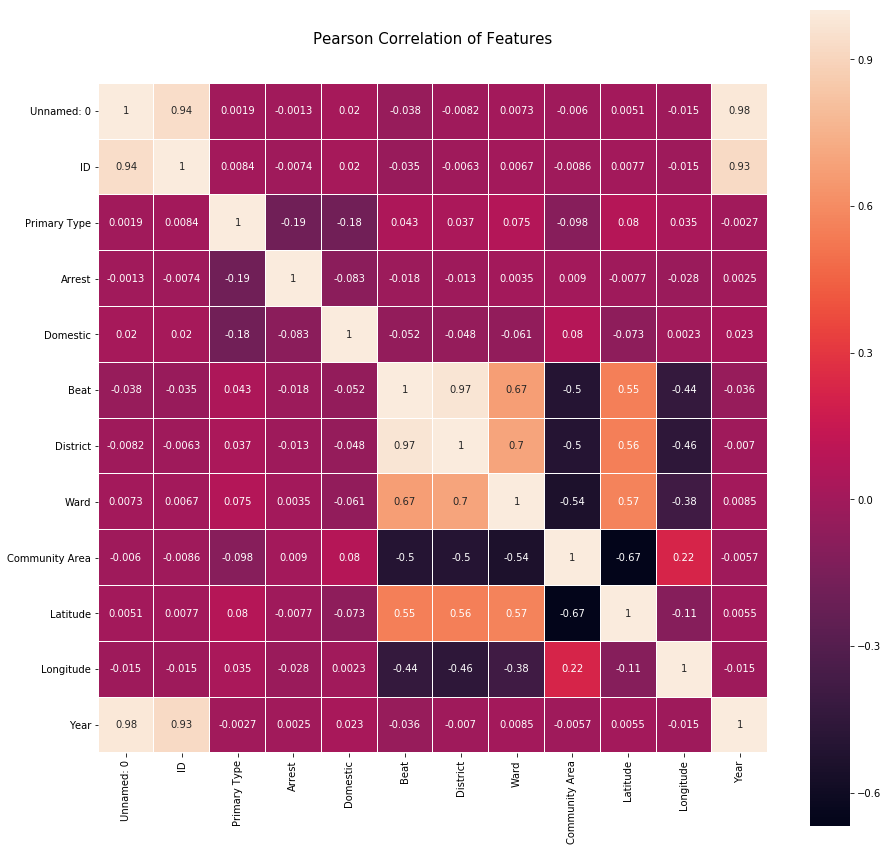

In [120]:
#creating heatmap for our snippet of code
corr=crimebin_train.corr(method='pearson', min_periods=1)#THis creates correlation matrix
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [224]:
#KNN
X_train = crimebin_train[['Ward', 'District']]
y_train = crimebin_train['Primary Type']
X_test= crimebin_test[['Ward','District']]
y_test= crimebin_test['Primary Type']
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
print('pred values:')
print(pred)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

pred values:
[ 0.  0.  0. ...,  0.  1.  0.]
[[71017 10720]
 [17752  7514]]


             precision    recall  f1-score   support

        0.0       0.80      0.87      0.83     81737
        1.0       0.41      0.30      0.35     25266

avg / total       0.71      0.73      0.72    107003

0.733914002411


In [225]:
#Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('classification_report for Decision Tree:')
print(classification_report(y_test,pred))
print('confusion_matrix for Decision Tree:')
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test, pred))

classification_report for Decision Tree:
             precision    recall  f1-score   support

        0.0       0.79      0.96      0.86     81737
        1.0       0.53      0.15      0.24     25266

avg / total       0.72      0.77      0.71    107003

confusion_matrix for Decision Tree:
[[78292  3445]
 [21429  3837]]
0.767539227872


In [226]:
#Applying RndForest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predr=rfc.predict(X_test)
print('classification_report for Random Forest:')
print(classification_report(y_test,predr))
print('confusion_matrix for Random Forest:')
print(confusion_matrix(y_test,predr))
print(accuracy_score(y_test, pred))

classification_report for Random Forest:
             precision    recall  f1-score   support

        0.0       0.79      0.96      0.86     81737
        1.0       0.53      0.15      0.24     25266

avg / total       0.72      0.77      0.71    107003

confusion_matrix for Random Forest:
[[78292  3445]
 [21429  3837]]
0.767539227872


# Q2 Multi Class Classification Problem

In [204]:
crime=pd.read_csv('chicago_crimes_data_2010_2017.csv')
crime['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BATTERY', 'ROBBERY',
       'THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'OFFENSE INVOLVING CHILDREN', 'ASSAULT', 'NARCOTICS',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL TRESPASS',
       'GAMBLING', 'CRIM SEXUAL ASSAULT', 'PROSTITUTION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
       'HOMICIDE', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'STALKING',
       'ARSON', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'KIDNAPPING',
       'PUBLIC INDECENCY', 'INTIMIDATION', 'NON - CRIMINAL', 'OBSCENITY',
       'CONCEALED CARRY LICENSE VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING'], dtype=object)

In [205]:
#Aasigning numeric labels to values
crime['Primary Type'] = crime['Primary Type'].map({'THEFT': 1, 'CRIMINAL DAMAGE': 2, 'WEAPONS VIOLATION' : 3, 'BATTERY': 4, 'ROBBERY':5,
    'BURGLARY':6, 'MOTOR VEHICLE THEFT':7,
       'OFFENSE INVOLVING CHILDREN':8, 'ASSAULT':9, 'NARCOTICS':10,
       'DECEPTIVE PRACTICE':11, 'OTHER OFFENSE':12, 'CRIMINAL TRESPASS':13,
       'GAMBLING':14, 'CRIM SEXUAL ASSAULT':15, 'PROSTITUTION':16,
       'INTERFERENCE WITH PUBLIC OFFICER':17, 'LIQUOR LAW VIOLATION':18,
       'HOMICIDE':19, 'PUBLIC PEACE VIOLATION':20, 'SEX OFFENSE':21, 'STALKING':22,
       'ARSON':23, 'NON-CRIMINAL (SUBJECT SPECIFIED)':24, 'KIDNAPPING':25,
       'PUBLIC INDECENCY':26, 'INTIMIDATION':27, 'NON - CRIMINAL':28, 'OBSCENITY':29,
       'CONCEALED CARRY LICENSE VIOLATION':30, 'OTHER NARCOTIC VIOLATION':31,
       'NON-CRIMINAL':32, 'HUMAN TRAFFICKING':33})

In [206]:
crime

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,2,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
1,720647,8417624,HT650924,12/28/2011 21:17,002XX W 118TH ST,143A,3,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5,34,53,15,42,-88,2011,train
2,32037,7348669,HS150223,2/3/2010 21:40,026XX W 24TH ST,486,4,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10,28,30,08B,42,-88,2010,train
3,532182,8124889,HT358665,6/21/2011 13:10,017XX W PRYOR AVE,320,5,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22,19,75,3,42,-88,2011,train
4,1245448,9301182,HW445774,8/5/2013 12:00,038XX N SHEFFIELD AVE,810,1,OVER $500,OTHER,False,False,1923,19,44,6,6,42,-88,2013,train
5,333192,7810523,HS620548,11/17/2010 10:30,077XX S SOUTH SHORE DR,610,6,FORCIBLE ENTRY,APARTMENT,False,False,421,4,7,43,5,42,-88,2010,train
6,1426734,9553552,HX205552,3/31/2014 0:01,033XX W FRANKLIN BLVD,910,7,AUTOMOBILE,STREET,True,False,1121,11,28,23,7,42,-88,2014,train
7,1300180,9336715,HW480384,10/5/2013 4:15,002XX E 121ST PL,1310,2,TO PROPERTY,APARTMENT,True,True,532,5,9,53,14,42,-88,2013,train
8,90734,7439846,HS242094,4/4/2010 20:45,074XX N CLARK ST,890,1,FROM BUILDING,NURSING HOME/RETIREMENT HOME,False,False,2422,24,49,1,6,42,-88,2010,train
9,1028186,8899858,HV574003,11/23/2012 16:00,048XX S LAFLIN ST,1780,8,OTHER OFFENSE,RESIDENCE,False,False,933,9,20,61,26,42,-88,2012,train


In [207]:
crime = crime.sort_values('train_or_test', ascending=False)
crime

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,2,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25,36,18,14,42,-88,2012,train
254177,309726,7773726,HS581397,10/25/2010 10:00,082XX S EVANS AVE,530,9,AGGRAVATED: OTHER DANG WEAPON,APARTMENT,False,True,631,6,6,44,04A,42,-88,2010,train
254186,1816930,10215652,HY401929,8/29/2015 11:10,055XX W FULTON ST,4625,12,PAROLE VIOLATION,SIDEWALK,True,False,1523,15,28,25,26,42,-88,2015,train
254185,50538,7378068,HS179896,2/24/2010 21:07,045XX S LA CROSSE AVE,1811,10,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,True,False,814,8,23,56,18,42,-88,2010,train
254184,1193091,10917208,HW311596,6/9/2013 16:45,033XX W JACKSON BLVD,2017,10,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,True,False,1134,11,28,27,18,nan,nan,2013,train
254183,1427124,9554345,HX206482,3/31/2014 15:15,047XX S UNION AVE,890,1,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",True,False,935,9,11,61,6,42,-88,2014,train
254182,1338630,9400703,HW543616,11/21/2013 18:00,001XX W NORTH AVE,820,1,$500 AND UNDER,STREET,False,False,1821,18,43,8,6,42,-88,2013,train
254181,710286,8402254,HT634892,12/16/2011 13:25,013XX W MELROSE ST,2820,12,TELEPHONE THREAT,RESIDENCE,False,False,1924,19,44,6,26,42,-88,2011,train
254180,1158676,9149968,HW258604,5/2/2013 12:00,002XX S LAFLIN ST,890,1,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1231,12,2,28,6,42,-88,2013,train
254179,337306,7816089,HS626218,11/21/2010 14:10,021XX E 71ST ST,1330,13,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,333,3,5,43,26,42,-88,2010,train


In [208]:
#Again taking snippet of values
crime_train=crime[0:381266]
crime_test=crime[381267:488270]

In [209]:
#For multiclass, let's go the extra mile and convert Arrest and Domestic to 0 and 1
crime_train['Arrest'] = crime_train['Arrest']*1
crime_train['Domestic'] = crime_train['Domestic']*1
crime_train.head()

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/2012 11:00,023XX N NORDICA AVE,1320,2,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),0,0,2512,25,36,18,14,42,-88,2012,train
254177,309726,7773726,HS581397,10/25/2010 10:00,082XX S EVANS AVE,530,9,AGGRAVATED: OTHER DANG WEAPON,APARTMENT,0,1,631,6,6,44,04A,42,-88,2010,train
254186,1816930,10215652,HY401929,8/29/2015 11:10,055XX W FULTON ST,4625,12,PAROLE VIOLATION,SIDEWALK,1,0,1523,15,28,25,26,42,-88,2015,train
254185,50538,7378068,HS179896,2/24/2010 21:07,045XX S LA CROSSE AVE,1811,10,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,1,0,814,8,23,56,18,42,-88,2010,train
254184,1193091,10917208,HW311596,6/9/2013 16:45,033XX W JACKSON BLVD,2017,10,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,1,0,1134,11,28,27,18,nan,nan,2013,train


In [210]:
crime_test['Arrest'] = crime_test['Arrest']*1
crime_test['Domestic'] = crime_test['Domestic']*1
crime_test.head()

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
452602,2362370,11087557,JA431253,9/11/2017 9:00,014XX N LOTUS AVE,1152,11,ILLEGAL USE CASH CARD,RESIDENCE,0,0,2532,25,37,25,11,42,-88,2017,test
452603,2223919,10875533,JA183998,3/11/2017 22:15,056XX S CARPENTER ST,820,1,$500 AND UNDER,APARTMENT,0,0,712,7,16,68,6,42,-88,2017,test
452605,2231869,10888917,JA198933,3/24/2017 16:00,008XX S CALIFORNIA AVE,486,4,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,1135,11,28,27,08B,42,-88,2017,test
452604,2188717,10825242,JA126622,1/20/2017 7:30,043XX W 69TH ST,820,1,$500 AND UNDER,OTHER,0,0,833,8,13,65,6,42,-88,2017,test
452606,2396304,11130830,JA487399,10/26/2017 21:30,117XX S PRINCETON AVE,486,4,DOMESTIC BATTERY SIMPLE,SIDEWALK,0,1,522,5,34,53,08B,42,-88,2017,test


In [202]:
#dropping nan values from crimebin_train
crime_train.dropna(0, inplace=True)
crime_test.dropna(0, inplace=True)

c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


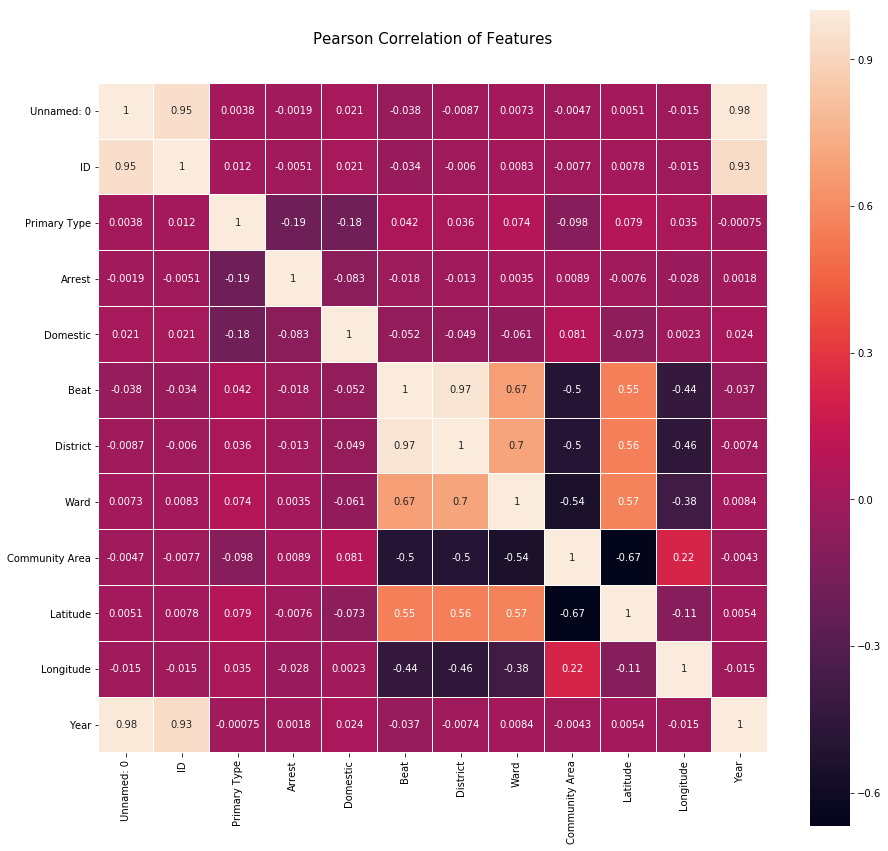

In [211]:
#creating heatmap for our snippet of code
corr=crimebin_train.corr(method='pearson', min_periods=1)#THis creates correlation matrix
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

## NOTE: Ward seems to be strongly correlated to Primary Type

In [213]:
#Applying Gaussian Naive Bayes to answer 2nd question
from sklearn.naive_bayes import GaussianNB
X_train = crimebin_train[['Ward', 'District']]
y_train = crimebin_train['Primary Type']
X_test= crimebin_test[['Ward','District']]
y_test= crimebin_test['Primary Type']
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
pred= model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86     13457
        1.0       0.00      0.00      0.00      4241

avg / total       0.58      0.76      0.66     17698



[[13457     0]
 [ 4241     0]]
0.760368403209


c:\users\aashr\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
#KNN
X_train = crimebin_train[['Ward', 'District']]
y_train = crimebin_train['Primary Type']
X_test= crimebin_test[['Ward','District']]
y_test= crimebin_test['Primary Type']
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
pred = KNN.predict(X_test)
print('pred values:')
print(pred)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

pred values:
[ 0.  0.  0. ...,  0.  0.  0.]
[[11755  1702]
 [ 2952  1289]]


             precision    recall  f1-score   support

        0.0       0.80      0.87      0.83     13457
        1.0       0.43      0.30      0.36      4241

avg / total       0.71      0.74      0.72     17698

0.737032433043


In [216]:
#Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('classification_report for Decision Tree:')
print(classification_report(y_test,pred))
print('confusion_matrix for Decision Tree:')
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test, pred))

classification_report for Decision Tree:
             precision    recall  f1-score   support

        0.0       0.78      0.96      0.86     13457
        1.0       0.54      0.16      0.24      4241

avg / total       0.72      0.77      0.71     17698

confusion_matrix for Decision Tree:
[[12891   566]
 [ 3576   665]]
0.765962255622
